<font color="pink">

### P452 COMPUTATIONAL PHYSICS__CODES FOR THE TERM PAPER

</font>


<font color="pink">

Gayathri K(2011067)</br>
Supervisor : Dr. Tuhin Ghosh</br>
Course Instructor : Dr Subashis Basak

</font>


-----------------

<font color="#FF8096">

## MINKOWSKI FUNCTIONAL ANALYSIS OF CMB ANISOTROPY MAPS
</font>


---


In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from scipy.special import erf

Some basic functions we need in the code.

In [2]:
#now we will integrate
#for each of these range,we need to calculate the minkowski functional,the equation is given below
def heaviside_step(u, v):
   
    if u < v:
        return 0
    elif u > v:
        return 1
    elif u == v:
        return 1
    

def dirac_delta(u, v, epsilon=1e-10):

    if abs(u - v) < epsilon:
        return 1   # Approaching infinity as epsilon approaches zero
    else:
        return 0
def minkowski_functional(u,v,u1,u2,u11,u22,u12):
    I0=heaviside_step(u,v)
    #now we need to calculate the I1 and I2 only when u==v
    if u==v:
     I1=(1/4)*dirac_delta(u,v)*np.sqrt(u1**2+u2**2)
     I2=(1/2*np.pi)*dirac_delta(u,v)*((2*u1*u2*u12-u22*u1**2-u11*u2**2)/(u1**2+u2**2))
    else:
        I1=0
        I2=0
    return I0,I1,I2

Reading the datafile. This is downloaded from the Lamda website.</br>
Here I used the file : wmap_ilc_9yr_v5.fits</br>
(https://lambda.gsfc.nasa.gov/product/wmap/dr5/ilc_map_get.html)


In [3]:
input_file = 'wmap_ilc_9yr_v5.fits'
wmap1 = hp.read_map(input_file)
print("Original nside: ",hp.get_nside(wmap1))
#the current nside is 512,we will make it 128 first
wmap=hp.pixelfunc.ud_grade(wmap1, 128, pess=False, order_in='RING', order_out='RING')
print("Current nside : ",hp.get_nside(wmap))

Original nside:  512
Current nside :  128


Now we will do minkowski functional analysis for both original wmap data and masked wmap data.

---


<font color="pink">

## CODES FOR UNMASKED DATA

</font>
For unmasked WMAP data,we plot the power spectrum, take the derivatives of sky map and plot the minkowski functionals.

Number of pixels :  196608


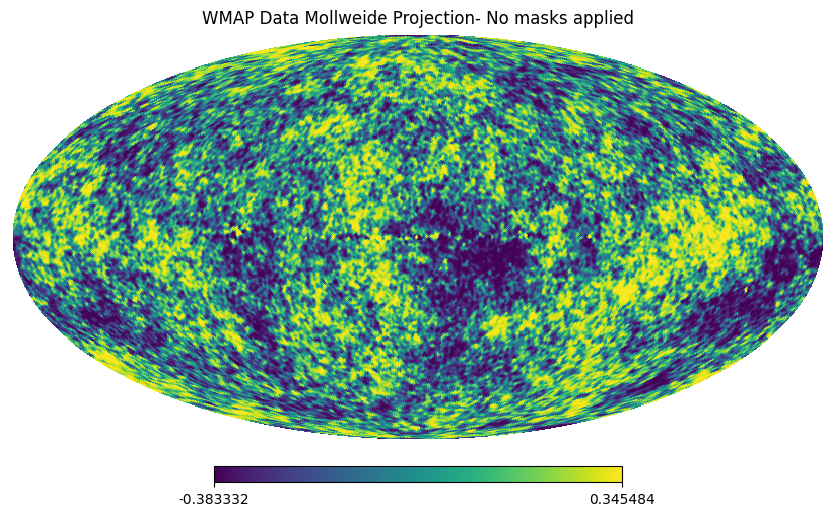

In [4]:
hp.mollview(wmap, cbar=True,norm='hist',cmap='viridis',title='WMAP Data Mollweide Projection- No masks applied')
print("Number of pixels : ",len(wmap))

### PLotting the power spectrum

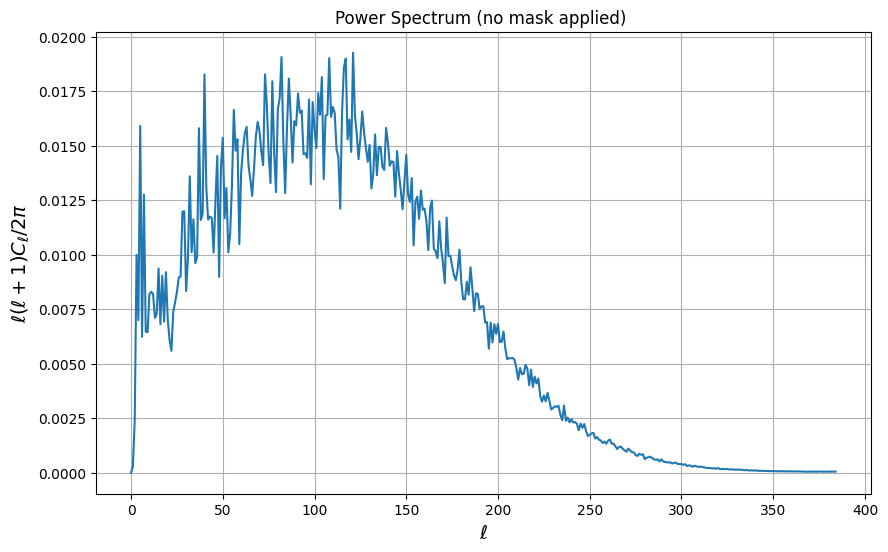

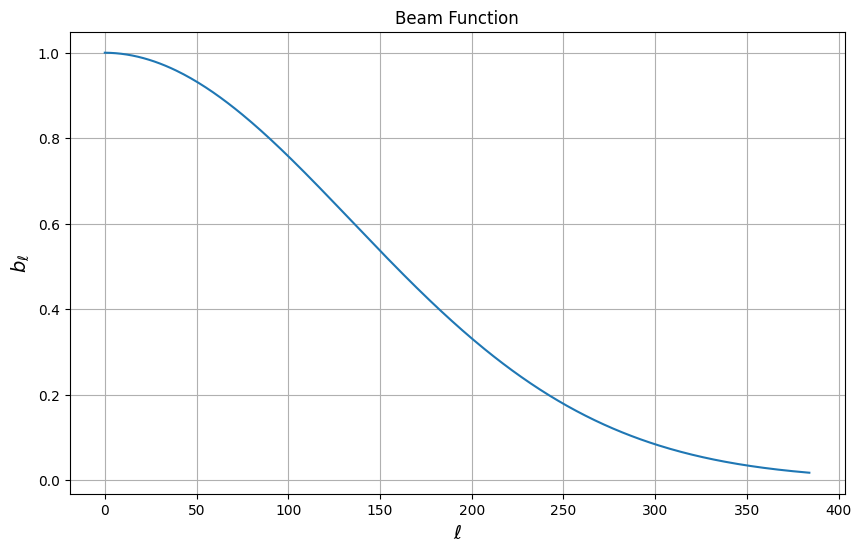

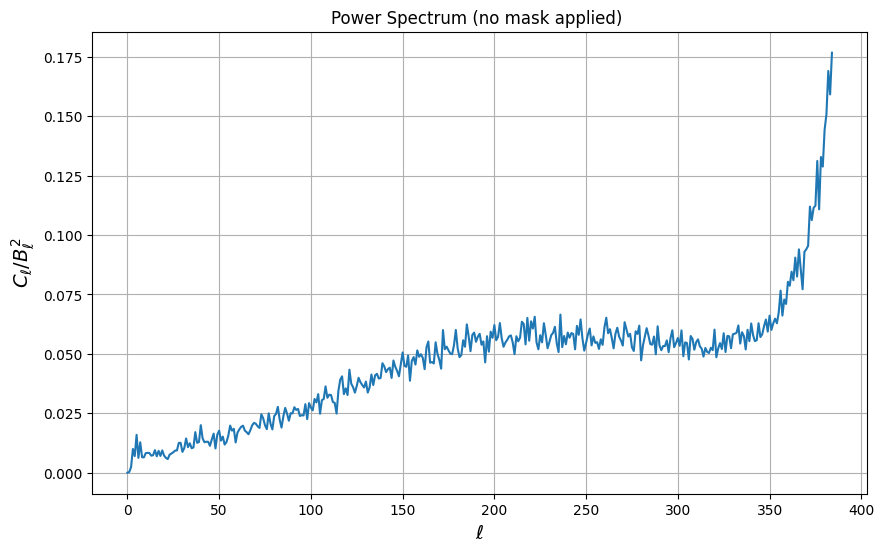

In [5]:

lmax=3*hp.get_nside(wmap)
cl = hp.anafast(wmap,use_pixel_weights= True,lmax=lmax)

# Plot the power spectrum
plt.figure(figsize=(10, 6))
ell = np.arange(len(cl))
plt.plot(ell, ell * (ell + 1) * cl/2*np.pi)
plt.xlabel('$\ell$', fontsize=14)
plt.ylabel('$\ell(\ell+1)C_{\ell}/2\pi$', fontsize=14)
plt.title('Power Spectrum (no mask applied) ')
plt.grid()
plt.show()


# Plot the b_l values
b_l=hp.sphtfunc.gauss_beam(0.0174533, lmax=lmax, pol=False)

plt.figure(figsize=(10, 6))
ell = np.arange(len(b_l))
plt.plot(ell, b_l)
plt.xlabel('$\ell$', fontsize=14)
plt.ylabel('$b_{\ell}$', fontsize=14)
plt.title('Beam Function')
plt.grid()
plt.show()

cl_corrected = cl / (b_l**2)
# Plot the corrected power spectrum
plt.figure(figsize=(10, 6))
ell = np.arange(len(cl))
plt.plot(ell, ell * (ell + 1) * cl_corrected/2*np.pi)
plt.xlabel('$\ell$', fontsize=14)
plt.ylabel('$C_{\ell}/B_{\ell}^2$', fontsize=14)
plt.title('Power Spectrum (no mask applied) ')
plt.grid()
plt.show()


### map to spherical harmonics and taking their derivatives

In [6]:
nside=hp.get_nside(wmap)
nlmax = 3 * nside - 1  
g_alm = hp.sphtfunc.map2alm(wmap, lmax=nlmax)

#first derivatives
g_map, d_theta_g, d_phi_g = hp.sphtfunc.alm2map_der1(g_alm, nside)


g_2_alm_theta=hp.sphtfunc.map2alm(d_theta_g, lmax=nlmax)
# Second derivatives (approximated)
theta_map_2, d2_theta_g, mixed1 = hp.sphtfunc.alm2map_der1(g_2_alm_theta, nside)
g_2_alm_phi=hp.sphtfunc.map2alm(d_phi_g, lmax=nlmax)
# Second derivatives (approximated)
phi_map_2, d2_phi_g, mixed2 = hp.sphtfunc.alm2map_der1(g_2_alm_phi, nside)
#mixed derivatives
d2_theta_phi_g=mixed1


mean of unmasked pixels :  0.0020388279
standard deviation of unmasked pixels :  0.069789


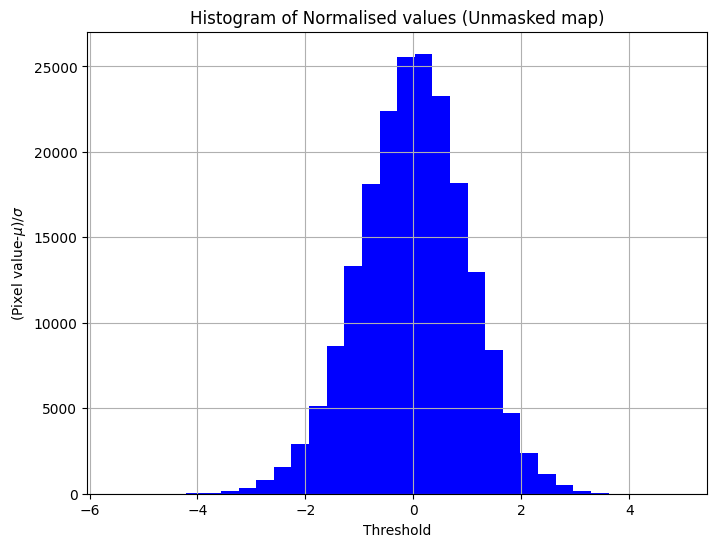

In [7]:
mean_value = np.mean(wmap)
std_dev=np.std(wmap)
print("mean of unmasked pixels : ",mean_value)
print("standard deviation of unmasked pixels : ",std_dev)

normalised_values=[]

wmap2 = np.ma.copy(wmap)

for i in range(len(wmap2)):
        wmap2[i] = (wmap2[i] - mean_value) / std_dev
        normalised_values.append(wmap2[i])
np.save('normalised_wmap', normalised_values)
plt.figure(figsize=(8, 6))
plt.hist(normalised_values, bins=32, color='blue')
plt.title('Histogram of Normalised values (Unmasked map)')
plt.xlabel('Threshold')
plt.ylabel(r'(Pixel value-$\mu$)/$\sigma$')
plt.grid()
plt.show()

### Minkowski functionals for unmasked data

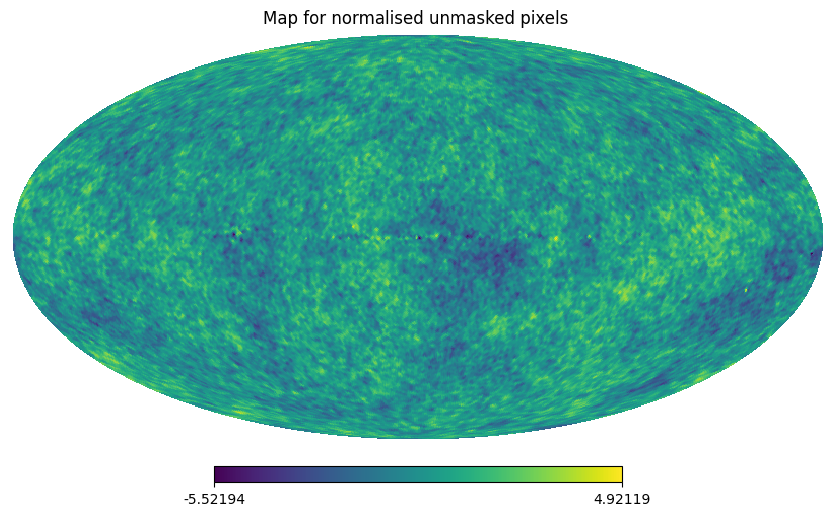

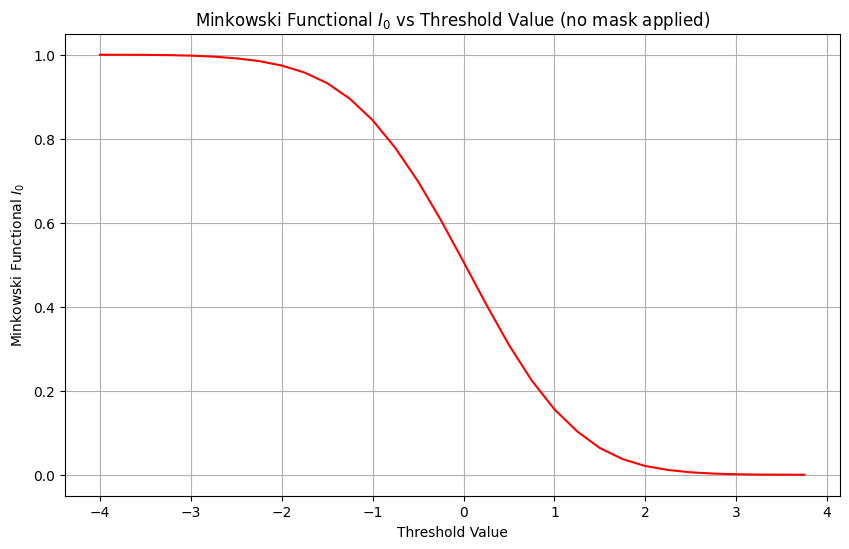

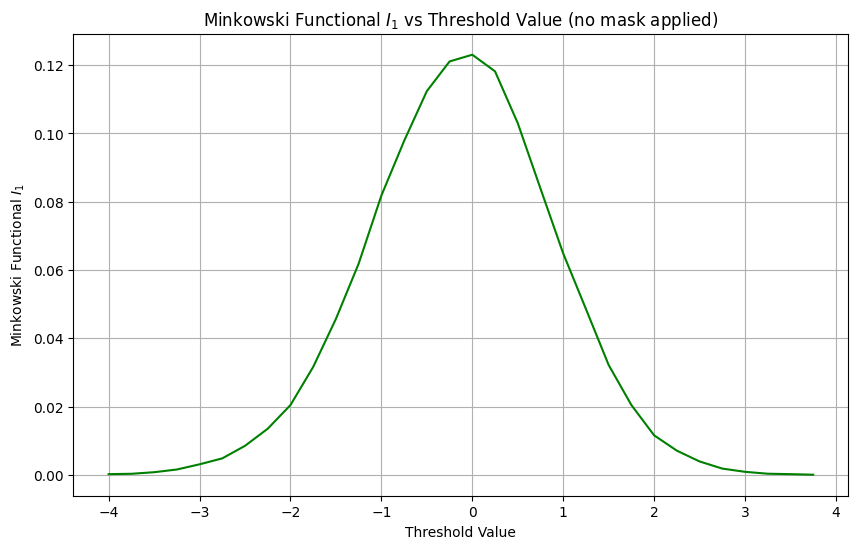

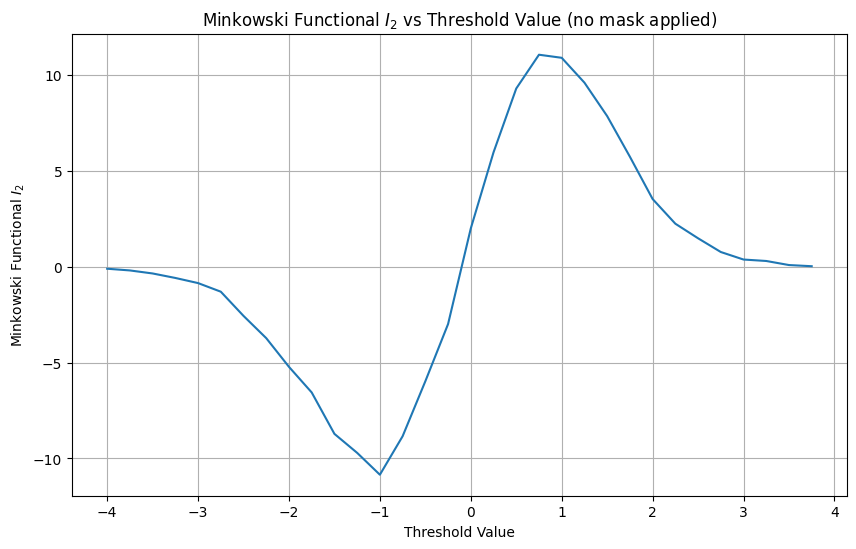

In [8]:

step_size = 0.25

hp.mollview(wmap2,title="Map for normalised unmasked pixels ")

# num_pixels = 162304
#   #len of norm_val
i0_array=[]
i1_array=[]
i2_array=[]
vlist=[]

for curr_value in np.arange(-4, 4, step_size):
   
    one=0
    two=0
    three=0
    vlist.append(curr_value)
    for value in np.arange(curr_value, 4, step_size):
        min_value = value
        max_value = value + step_size
        # vlist.append(value)
        
        mask = np.logical_and(wmap2 >= min_value, wmap2 < max_value)
      
        #mask=TRUE in this range,FALSE for all others
        # threshold=(min_value+max_value)/2
        new_masked_data = np.zeros(wmap2.shape)
        #now we have a copy of the masked data
        #the TRUE values in map are set to 1
        new_masked_data[mask] = 1
        for i in range (len(new_masked_data)):
            if new_masked_data[i]==1:
                one+= minkowski_functional(wmap2[i] , min_value, d_theta_g[i], d_phi_g[i], d2_theta_g[i], d2_phi_g[i], d2_theta_phi_g[i])[0]
                if curr_value == value:
                    two += minkowski_functional(min_value, min_value, d_theta_g[i], d_phi_g[i], d2_theta_g[i], d2_phi_g[i], d2_theta_phi_g[i])[1]
                    three += minkowski_functional(min_value, min_value, d_theta_g[i], d_phi_g[i], d2_theta_g[i], d2_phi_g[i], d2_theta_phi_g[i])[2]
    
    i0_array.append(one/(len(wmap)))
    i1_array.append(two/(len(wmap)))
 
    i2_array.append(three/(len(wmap)))

np.save('i0_array_nomask', i0_array)
np.save('i1_array_nomask', i1_array)
np.save('i2_array_nomask', i2_array)


    #hp.mollview(new_masked_data, title=f'Pixels in Range [{min_value}, {max_value}]', cmap='viridis')
    #for each point in the ranges we calculate the minkowski functionals
    

plt.figure(figsize=(10, 6))
plt.plot(vlist,(i0_array),'r-')
plt.xlabel('Threshold Value')
plt.ylabel(r'Minkowski Functional $I_0$')
plt.title(r'Minkowski Functional $I_0$ vs Threshold Value (no mask applied)')
plt.grid()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(vlist,(i1_array),'g-')
plt.xlabel('Threshold Value')
plt.ylabel(r'Minkowski Functional $I_1$')
plt.title(r'Minkowski Functional $I_1$ vs Threshold Value (no mask applied)')
plt.grid()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(vlist,(i2_array))
plt.xlabel('Threshold Value')
plt.ylabel(r'Minkowski Functional $I_2$')
plt.title(r'Minkowski Functional $I_2$ vs Threshold Value (no mask applied)')
plt.grid()
plt.show()

Next we will apply a galactic cut on the initial wmap data, ie,mask the pixels from galactic plane and do the same analysis.

---


<font color="pink">

## CODES FOR MASKED DATA

</font>
Here we will apply a galactic cut, ie,we will put a mask on the pixels 10 degrees above and below galactic plane. By doing this we aim to reduce the noise. The same processes we did for unmasked case is repeated here.

196608


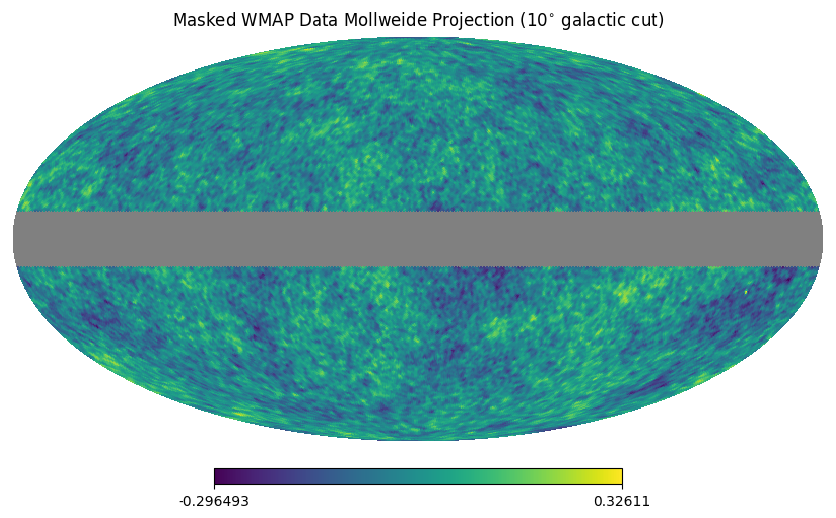

In [9]:

cut_angle=10
gal_cut_threshold = np.radians(cut_angle)  # 10 degrees

# create the mask(negative mask?)
nside = hp.get_nside(wmap)
theta, phi = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)))
galactic_cut_mask = np.abs(np.pi / 2 - theta) < gal_cut_threshold  # Invert the condition

# apply the mask 
masked_map_data = hp.ma(wmap)
masked_map_data.mask = galactic_cut_mask
print(len(masked_map_data))

# Step 3: Visualize the cleaned map
hp.mollview(masked_map_data, title=r'Masked WMAP Data Mollweide Projection ($10^{\circ}$ galactic cut)', cmap='viridis')
plt.show()


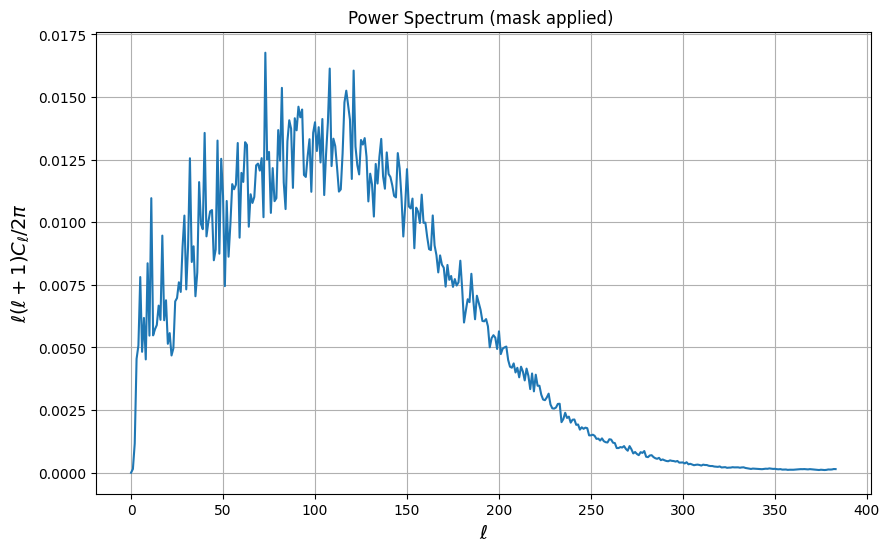

mean value of masked map pixels :  0.001805304
standard deviation of masked map pixels :  0.06706906


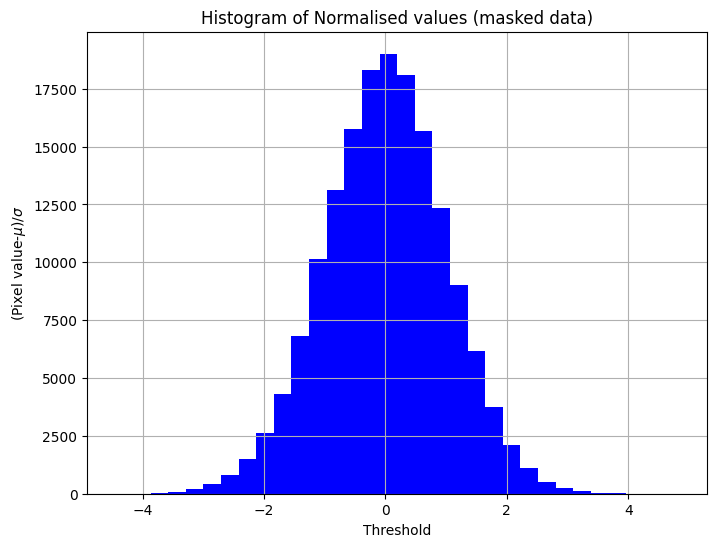

In [11]:
nside=128
lmax = 3 * nside - 1  
cl1 = hp.anafast(masked_map_data,use_pixel_weights= True,lmax=lmax)

# Plot the power spectrum
plt.figure(figsize=(10, 6))
ell = np.arange(len(cl1))
plt.plot(ell, ell * (ell + 1) * cl1/2*np.pi)
plt.xlabel('$\ell$', fontsize=14)
plt.ylabel('$\ell(\ell+1)C_{\ell}/2\pi$', fontsize=14)
plt.title('Power Spectrum (mask applied) ')
plt.grid()
plt.show()
g_alm = hp.sphtfunc.map2alm(wmap, lmax=lmax)

#first derivatives
g_map, d_theta_g, d_phi_g = hp.sphtfunc.alm2map_der1(g_alm, nside)


g_2_alm_theta=hp.sphtfunc.map2alm(d_theta_g, lmax=lmax)
# Second derivatives (approximated)
theta_map_2, d2_theta_g, mixed1 = hp.sphtfunc.alm2map_der1(g_2_alm_theta, nside)
g_2_alm_phi=hp.sphtfunc.map2alm(d_phi_g, lmax=lmax)
# Second derivatives (approximated)
phi_map_2, d2_phi_g, mixed2 = hp.sphtfunc.alm2map_der1(g_2_alm_phi, nside)
#

d2_theta_phi_g=mixed1
gal_cut_threshold = np.radians(cut_angle)  # 10 degrees
def mask(map):
    # create the mask(negative mask?)
    nside = hp.get_nside(map)
    theta, phi = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)))
    galactic_cut_mask = np.abs(np.pi / 2 - theta) < gal_cut_threshold  # Invert the condition

    # apply the mask 
    masked_map_data = hp.ma(map)
    masked_map_data.mask = galactic_cut_mask
   
amap=mask(d2_phi_g)
bmap=mask(d2_theta_g)
cmap=mask(d2_theta_phi_g)
mean_value = np.mean(masked_map_data.compressed())

print("mean value of masked map pixels : ",mean_value)
normalised_values=[]
std_dev=np.std(masked_map_data.compressed())
print("standard deviation of masked map pixels : ",std_dev)
masked_map_data2 = np.ma.copy(masked_map_data)

for i in range(len(masked_map_data2)):
    if type(masked_map_data2[i]) != np.ma.core.MaskedConstant:
        masked_map_data2[i] = (masked_map_data2[i] - mean_value) / std_dev
        normalised_values.append(masked_map_data2[i])
np.save('masked_map_data2', normalised_values)


plt.figure(figsize=(8, 6))
plt.hist(normalised_values, bins=32, color='blue')
plt.title('Histogram of Normalised values (masked data)')
plt.xlabel('Threshold')
plt.ylabel(r'(Pixel value-$\mu$)/$\sigma$')
plt.grid()
plt.show()

196608
162304


196608


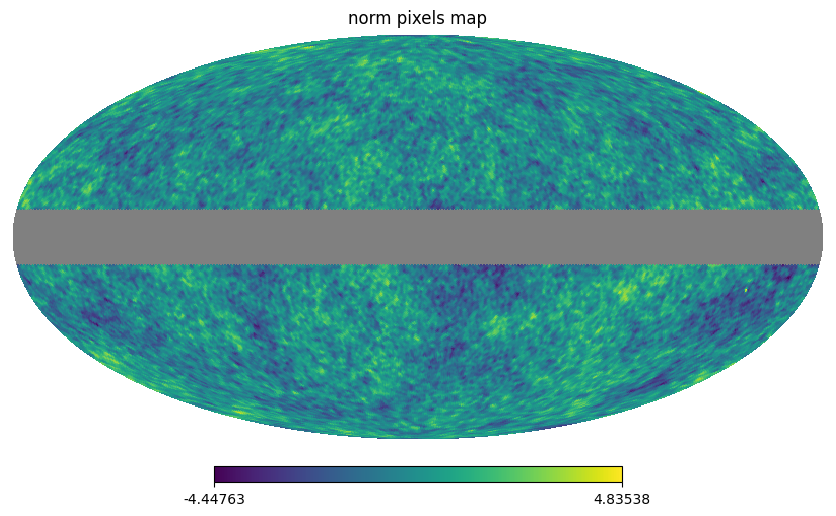

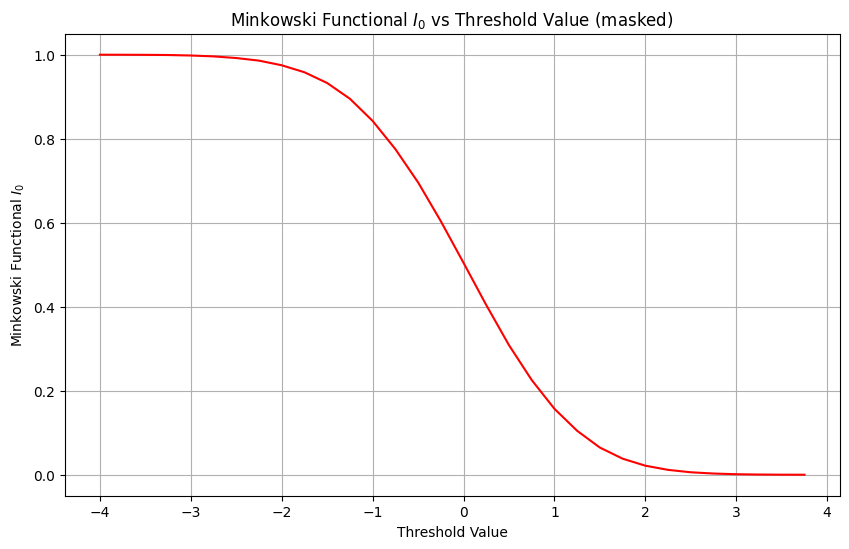

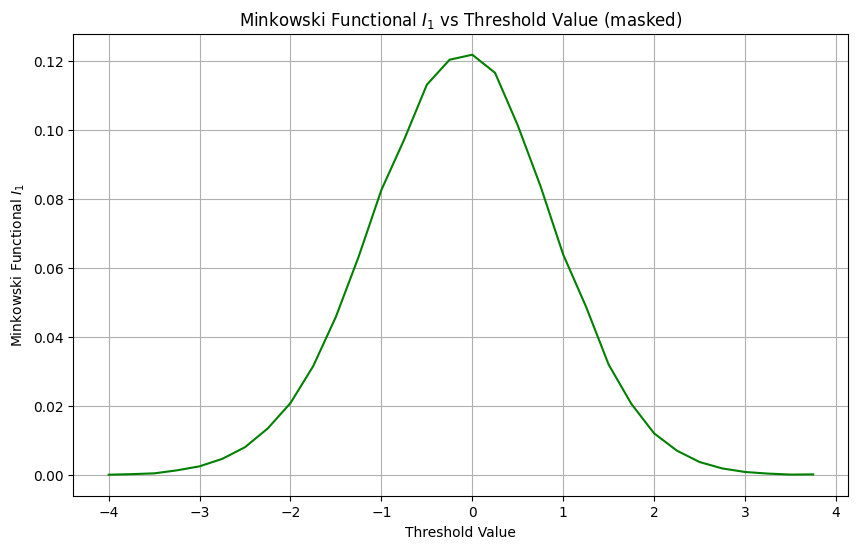

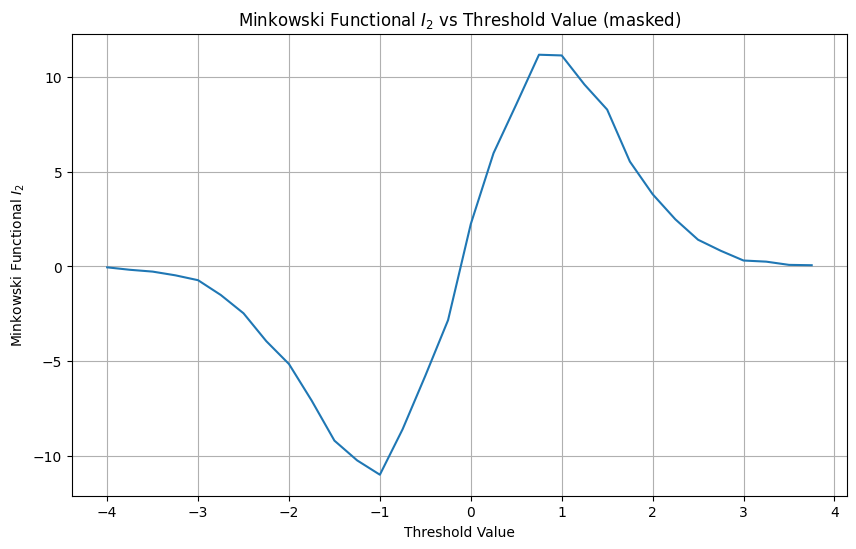

In [ ]:

step_size = 0.25

hp.mollview(masked_map_data2,title="norm pixels map")

# num_pixels = 162304
#   #len of norm_val
i0_array=[]
i1_array=[]
i2_array=[]
vlist=[]
existing_mask = np.ma.copy(np.ma.getmask(masked_map_data2))
existing_mask_NOT = np.invert(existing_mask)
for curr_value in np.arange(-4, 4, step_size):
   
    one=0
    two=0
    three=0
    vlist.append(curr_value)
    for value in np.arange(curr_value, 4, step_size):
        min_value = value
        max_value = value + step_size
        # vlist.append(value)
        
        mask = np.logical_and(masked_map_data2 >= min_value, masked_map_data2 < max_value)
        mask = np.logical_and(mask, existing_mask_NOT)
        #mask=TRUE in this range,FALSE for all others
        # threshold=(min_value+max_value)/2
        new_masked_data = np.zeros(masked_map_data2.shape)
        #now we have a copy of the masked data
        #the TRUE values in map are set to 1
        new_masked_data[mask] = 1
        for i in range (len(new_masked_data)):
            if new_masked_data[i]==1:
                one+= minkowski_functional(masked_map_data2[i] , min_value, d_theta_g[i], d_phi_g[i], d2_theta_g[i], d2_phi_g[i], d2_theta_phi_g[i])[0]
                if curr_value == value:
                    two += minkowski_functional(min_value, min_value, d_theta_g[i], d_phi_g[i], d2_theta_g[i], d2_phi_g[i], d2_theta_phi_g[i])[1]
                    three += minkowski_functional(min_value, min_value, d_theta_g[i], d_phi_g[i], d2_theta_g[i], d2_phi_g[i], d2_theta_phi_g[i])[2]
    
    i0_array.append(one/(len(masked_map_data2.compressed())))
    i1_array.append(two/(len(masked_map_data2.compressed())))
    i2_array.append(three/(len(masked_map_data2.compressed())))
   
    

np.save('i0_array_mask', i0_array)
np.save('i1_array_mask', i1_array)
np.save('i2_array_mask', i2_array)


    #hp.mollview(new_masked_data, title=f'Pixels in Range [{min_value}, {max_value}]', cmap='viridis')
    #for each point in the ranges we calculate the minkowski functionals
print(len(masked_map_data2))
plt.figure(figsize=(10, 6))
plt.plot(vlist,i0_array,'r')
plt.xlabel('Threshold Value')
plt.ylabel(r'Minkowski Functional $I_0$')
plt.title(r'Minkowski Functional $I_0$ vs Threshold Value (masked)')
plt.grid()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(vlist,i1_array,'g')
plt.xlabel('Threshold Value')
plt.ylabel(r'Minkowski Functional $I_1$')
plt.title(r'Minkowski Functional $I_1$ vs Threshold Value (masked)')
plt.grid()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(vlist,i2_array)
plt.xlabel('Threshold Value')
plt.ylabel(r'Minkowski Functional $I_2$')
plt.title(r'Minkowski Functional $I_2$ vs Threshold Value (masked)')
plt.grid()
plt.show()


---


<font color="pink">

## SIMULATIONS

</font>
Now we simulate a gaussian sky map, do the same steps and find minkowski functionals, over 1000 realizations. Both masked and unmasked simulations are made. All the data are stored as npy files because each simulation takes 4+ hours to run.
<ul>
  <li>Trial 1: Unsaved simulation</li>
  <li>Trial 2: 385 cell random cell values constant for all realizations, but cl calculated not saved</li>
  <li>Trial 3: 2 cell values per realization </li>
  <li>Trial 4: 385 cell random cell values constant for all realizations</li>
  <li>Trial 5: 385 cell random cell values constant for all realizations, cl calculated saved, mu saved, Minkowski functional</li>
  <li>Trial 6: Recursive cl for each realization</li>
  <li>Trial 7: Only saved the arrays
  <li>Trial 8: Without saving min_data</li>
  <li>Trial 9: Best simulation without any masking</li>
  <li>Trial 10: Masked simulation</li>
</ul>


### TRIAL 1

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from tqdm import tqdm
n_realizations = 1000
io_final = []
i1_final = []
i2_final = []
cl_calculated = []
mu_all = []
std_all = []
fig,axs=plt.subplots(3,1,figsize=(12,18))
axs[0].set_title(f"Minkowski functional I0 vs Threshold for {n_realizations} realizations")
axs[1].set_title(f"Minkowski functional I1 vs Threshold for {n_realizations} realizations")            
axs[2].set_title(f"Minkowski functional I2 vs Threshold for {n_realizations} realizations")
axs[0].set_xlabel("Threshold ")
axs[1].set_xlabel("Threshold")
axs[2].set_xlabel("Threshold")
axs[0].set_ylabel("Minkowski functional I0")    
axs[1].set_ylabel("Minkowski functional I1")
axs[2].set_ylabel("Minkowski functional I2")
for realization in tqdm(range(n_realizations)):
    # Generate random c_ell for each realization
    c_ell = cl  # Example of how c_ell can be randomized, modify as per your requirement
   
    # plt.figure(figsize=(10,7))
    # plt.plot(ell, c_ell*ell*(ell+1)/(2.*np.pi))
    synth_map = hp.synfast(c_ell, nside)
    # hp.mollview(synth_map)
    cl = hp.anafast(synth_map, use_pixel_weights=True, lmax=lmax)
    cl_calculated.append(cl)

    # # Plot the power spectrum
    # plt.figure(figsize=(10, 6))
    # ell = np.arange(len(cl))
    # plt.plot(ell, ell * (ell + 1) * cl/2*np.pi)
    # plt.xlabel('$\ell$', fontsize=14)
    # plt.ylabel('$\ell(\ell+1)C_{\ell}/2\pi$', fontsize=14)
    # plt.title('Power Spectrum ')
    # plt.grid()

    nlmax = 3 * nside - 1
    g_alm_synth= hp.sphtfunc.map2alm(synth_map, lmax=nlmax)

    # Calculate first derivatives
    g_map_syn, d_theta_g_syn, d_phi_g_syn = hp.sphtfunc.alm2map_der1(g_alm_synth, nside)

    g_2_alm_theta_syn = hp.sphtfunc.map2alm(d_theta_g_syn, lmax=nlmax)
    theta_map_2_syn, d2_theta_g_syn, mixed1_syn = hp.sphtfunc.alm2map_der1(g_2_alm_theta_syn, nside)

    g_2_alm_phi_syn = hp.sphtfunc.map2alm(d_phi_g_syn, lmax=nlmax)
    phi_map_2_syn, d2_phi_g_syn, mixed2_syn = hp.sphtfunc.alm2map_der1(g_2_alm_phi_syn, nside)

   

    d2_theta_phi_g_syn = mixed1_syn
    mean_value_syn = np.mean(synth_map)
    std_dev_syn = np.std(synth_map)
    synth_map_data_copy = np.ma.copy(synth_map)

    mu_all.append(mean_value_syn)
    std_all.append(std_dev_syn)
 
    for i in range(len(synth_map_data_copy)):
        if type(synth_map_data_copy[i]) != np.ma.core.MaskedConstant:
            synth_map_data_copy[i] = (synth_map_data_copy[i] - mean_value_syn) / std_dev_syn

    new_norm_val_syn = synth_map_data_copy

    # plt.figure(figsize=(8, 6))
    # plt.hist(new_norm_val_syn, bins=100, color='blue')
    # plt.title('Histogram of Normalised values')
    # plt.xlabel('Pixel Value')
    # plt.ylabel('Frequency')
    # plt.grid()

    step_size = 0.25

    # hp.mollview(synth_map_data_copy, title="norm pixels map")

    i0_array_syn = []
    i1_array_syn = []
    i2_array_syn = []
    vlist_syn = []

    for value in np.arange(-4, 4, step_size):
    
        one=0
        two=0
        three=0
        vlist_syn.append(value)
        min_value = value
        max_value = value + step_size
        # vlist.append(value)
        
        mask = np.logical_and(synth_map_data_copy >= min_value, synth_map_data_copy < max_value)
        #mask=TRUE in this range,FALSE for all others
        # threshold=(min_value+max_value)/2
        new_masked_data = np.zeros(synth_map_data_copy.shape)
        #now we have a copy of the masked data
        #the TRUE values in map are set to 1
        new_masked_data[mask] = 1
        for i in range (len(new_masked_data)):
            if new_masked_data[i]==1:
                one+= minkowski_functional(synth_map_data_copy[i] , min_value, d_theta_g_syn[i], d_phi_g_syn[i], d2_theta_g_syn[i], d2_phi_g_syn[i], d2_theta_phi_g_syn[i])[0]
                two += minkowski_functional(min_value, min_value, d_theta_g_syn[i], d_phi_g_syn[i], d2_theta_g_syn[i], d2_phi_g_syn[i], d2_theta_phi_g_syn[i])[1]
                three += minkowski_functional(min_value, min_value, d_theta_g_syn[i], d_phi_g_syn[i], d2_theta_g_syn[i], d2_phi_g_syn[i], d2_theta_phi_g_syn[i])[2]
        
        i0_array_syn.append(one)
        i1_array_syn.append(two)
        i2_array_syn.append(three)

    for i in range(len(i0_array_syn)-2,-1,-1):
        i0_array_syn[i] += i0_array_syn[i+1]

    axs[0].plot(vlist_syn, i0_array_syn)
    axs[1].plot(vlist_syn, i1_array_syn)
    axs[2].plot(vlist_syn, i2_array_syn)
plt.savefig("minkowski_functional_trial1.png")
np.save("cl_calculated_newtrial5.npy",cl_calculated)
np.save("mu_all_newtrial5.npy",mu_all)
np.save("std_all_newtrial5.npy",std_all)
plt.show()


### TRIAL 3

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from tqdm import tqdm
n_realizations = 1000
nside = 128
np.random.seed(1234)
c_ell_range = (0,1)
ell_max = 3 * nside - 1 # (1, inf)
c_ell_values = np.random.uniform(c_ell_range[0], c_ell_range[1], 2*n_realizations)
cl_calculated = []
allrealization_f_arrays = []

for realization in tqdm(range(n_realizations)):
    # Generate random c_ell for each realization
    c_ell = c_ell_values[2*realization:2*realization + 2 ]
    # c_ell = c_ell_values[realization]

    # plt.figure(figsize=(10,7))
    # plt.plot(ell, c_ell*ell*(ell+1)/(2.*np.pi))
    synth_map = hp.synfast(c_ell, nside)
    # hp.mollview(synth_map)
    cl = hp.anafast(synth_map, use_pixel_weights=True, lmax=ell_max)
    cl_calculated.append(cl)

    # # Plot the power spectrum
    # plt.figure(figsize=(10, 6))
    # ell = np.arange(len(cl))
    # plt.plot(ell, ell * (ell + 1) * cl/2*np.pi)
    # plt.xlabel('$\ell$', fontsize=14)
    # plt.ylabel('$\ell(\ell+1)C_{\ell}/2\pi$', fontsize=14)
    # plt.title('Power Spectrum ')
    # plt.grid()

    nlmax = 3 * nside - 1
  

    mean_value_syn = np.mean(synth_map)
    std_dev_syn = np.std(synth_map)
    synth_map_data_copy = np.ma.copy(synth_map)

    for i in range(len(synth_map_data_copy)):
        if type(synth_map_data_copy[i]) != np.ma.core.MaskedConstant:
            synth_map_data_copy[i] = (synth_map_data_copy[i] - mean_value_syn) / std_dev_syn

    new_norm_val_syn = synth_map_data_copy

    # plt.figure(figsize=(8, 6))
    # plt.hist(new_norm_val_syn, bins=100, color='blue')
    # plt.title('Histogram of Normalised values')
    # plt.xlabel('Pixel Value')
    # plt.ylabel('Frequency')
    # plt.grid()

    step_size = 0.5

    # hp.mollview(synth_map_data_copy, title="norm pixels map")

    vlist_syn = []
    f_array = []
    for value in np.arange(-4, 4, step_size):
    
        vlist_syn.append(value)
        min_value = value
        max_value = value + step_size
        # vlist.append(value)
        
        mask = np.logical_and(synth_map_data_copy >= min_value, synth_map_data_copy < max_value)

        #mask=TRUE in this range,FALSE for all others
        # threshold=(min_value+max_value)/2
        new_masked_data = np.zeros(synth_map_data_copy.shape)
        #now we have a copy of the masked data
        #the TRUE values in map are set to 1
        new_masked_data[mask] = 1
        sum_f = 0
        for i in range (len(new_masked_data)):
            if new_masked_data[i]==1:
                sum_f += 1
        f_array.append(sum_f)

    allrealization_f_arrays.append(np.copy(f_array))

trial_name = "trial3_"

np.save(trial_name + "allrealization_f_arrays.npy", allrealization_f_arrays)
np.save(trial_name + "cl_calculated.npy", cl_calculated)
np.save(trial_name + "c_ell_values.npy", c_ell_values)


### TRIAL 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from tqdm import tqdm
n_realizations = 1000
nside = 128
np.random.seed(1234)
c_ell_range = (0,1)
ell_max = 3 * nside - 1 # (1, inf)
c_ell_values = np.random.uniform(c_ell_range[0], c_ell_range[1], ell_max)
cl_calculated = []
allrealization_f_arrays = []

for realization in tqdm(range(n_realizations)):
    # Generate random c_ell for each realization

    # plt.figure(figsize=(10,7))
    # plt.plot(ell, c_ell*ell*(ell+1)/(2.*np.pi))
    synth_map = hp.synfast(c_ell_values, nside)
    # hp.mollview(synth_map)
    cl = hp.anafast(synth_map, use_pixel_weights=True, lmax=ell_max)
    cl_calculated.append(cl)

    # # Plot the power spectrum
    # plt.figure(figsize=(10, 6))
    # ell = np.arange(len(cl))
    # plt.plot(ell, ell * (ell + 1) * cl/2*np.pi)
    # plt.xlabel('$\ell$', fontsize=14)
    # plt.ylabel('$\ell(\ell+1)C_{\ell}/2\pi$', fontsize=14)
    # plt.title('Power Spectrum ')
    # plt.grid()

    nlmax = 3 * nside - 1
  

    mean_value_syn = np.mean(synth_map)
    std_dev_syn = np.std(synth_map)
    synth_map_data_copy = np.ma.copy(synth_map)

    for i in range(len(synth_map_data_copy)):
        if type(synth_map_data_copy[i]) != np.ma.core.MaskedConstant:
            synth_map_data_copy[i] = (synth_map_data_copy[i] - mean_value_syn) / std_dev_syn

    new_norm_val_syn = synth_map_data_copy

    # plt.figure(figsize=(8, 6))
    # plt.hist(new_norm_val_syn, bins=100, color='blue')
    # plt.title('Histogram of Normalised values')
    # plt.xlabel('Pixel Value')
    # plt.ylabel('Frequency')
    # plt.grid()

    step_size = 0.5

    # hp.mollview(synth_map_data_copy, title="norm pixels map")

    vlist_syn = []
    f_array = []
    for value in np.arange(-4, 4, step_size):
    
        vlist_syn.append(value)
        min_value = value
        max_value = value + step_size
        # vlist.append(value)
        
        mask = np.logical_and(synth_map_data_copy >= min_value, synth_map_data_copy < max_value)

        #mask=TRUE in this range,FALSE for all others
        # threshold=(min_value+max_value)/2
        new_masked_data = np.zeros(synth_map_data_copy.shape)
        #now we have a copy of the masked data
        #the TRUE values in map are set to 1
        new_masked_data[mask] = 1
        sum_f = 0
        for i in range (len(new_masked_data)):
            if new_masked_data[i]==1:
                sum_f += 1
        f_array.append(sum_f)

    allrealization_f_arrays.append(np.copy(f_array))

trial_name = "trial4_"

np.save(trial_name + "allrealization_f_arrays.npy", allrealization_f_arrays)
np.save(trial_name + "cl_calculated.npy", cl_calculated)
np.save(trial_name + "c_ell_values.npy", c_ell_values)


### TRIAL 5

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from tqdm import tqdm
n_realizations = 1000
nside = 128
np.random.seed(1234)
c_ell_range = (0,1)
ell_max = 3 * nside - 1 # (1, inf)
c_ell_values = np.random.uniform(c_ell_range[0], c_ell_range[1], ell_max)
io_final = []
i1_final = []
i2_final = []
cl_calculated = []
mu_all = []
std_all = []
fig,axs=plt.subplots(3,1,figsize=(12,18))
axs[0].set_title(f"Minkowski functional I0 vs Threshold for {n_realizations} realizations")
axs[1].set_title(f"Minkowski functional I1 vs Threshold for {n_realizations} realizations")            
axs[2].set_title(f"Minkowski functional I2 vs Threshold for {n_realizations} realizations")
axs[0].set_xlabel("Threshold ")
axs[1].set_xlabel("Threshold")
axs[2].set_xlabel("Threshold")
axs[0].set_ylabel("Minkowski functional I0")    
axs[1].set_ylabel("Minkowski functional I1")
axs[2].set_ylabel("Minkowski functional I2")
for realization in tqdm(range(n_realizations)):
    # Generate random c_ell for each realization
    # plt.figure(figsize=(10,7))
    # plt.plot(ell, c_ell*ell*(ell+1)/(2.*np.pi))
    synth_map = hp.synfast(c_ell_values, nside)
    # hp.mollview(synth_map)
    cl = hp.anafast(synth_map, use_pixel_weights=True, lmax=ell_max)
    cl_calculated.append(cl)
    # # Plot the power spectrum
    # plt.figure(figsize=(10, 6))
    # ell = np.arange(len(cl))
    # plt.plot(ell, ell * (ell + 1) * cl/2*np.pi)
    # plt.xlabel('$\ell$', fontsize=14)
    # plt.ylabel('$\ell(\ell+1)C_{\ell}/2\pi$', fontsize=14)
    # plt.title('Power Spectrum ')
    # plt.grid()

    nlmax = 3 * nside - 1
    g_alm_synth= hp.sphtfunc.map2alm(synth_map, lmax=nlmax)

    # Calculate first derivatives
    g_map_syn, d_theta_g_syn, d_phi_g_syn = hp.sphtfunc.alm2map_der1(g_alm_synth, nside)

    g_2_alm_theta_syn = hp.sphtfunc.map2alm(d_theta_g_syn, lmax=nlmax)
    theta_map_2_syn, d2_theta_g_syn, mixed1_syn = hp.sphtfunc.alm2map_der1(g_2_alm_theta_syn, nside)

    g_2_alm_phi_syn = hp.sphtfunc.map2alm(d_phi_g_syn, lmax=nlmax)
    phi_map_2_syn, d2_phi_g_syn, mixed2_syn = hp.sphtfunc.alm2map_der1(g_2_alm_phi_syn, nside)

   

    d2_theta_phi_g_syn = mixed1_syn
    mean_value_syn = np.mean(synth_map)
    std_dev_syn = np.std(synth_map)
    synth_map_data_copy = np.ma.copy(synth_map)

    mu_all.append(mean_value_syn)
    std_all.append(std_dev_syn)

    for i in range(len(synth_map_data_copy)):
        if type(synth_map_data_copy[i]) != np.ma.core.MaskedConstant:
            synth_map_data_copy[i] = (synth_map_data_copy[i] - mean_value_syn) / std_dev_syn

    new_norm_val_syn = synth_map_data_copy

    # plt.figure(figsize=(8, 6))
    # plt.hist(new_norm_val_syn, bins=100, color='blue')
    # plt.title('Histogram of Normalised values')
    # plt.xlabel('Pixel Value')
    # plt.ylabel('Frequency')
    # plt.grid()

    step_size = 0.25

    # hp.mollview(synth_map_data_copy, title="norm pixels map")

    i0_array_syn = []
    i1_array_syn = []
    i2_array_syn = []
    vlist_syn = []

    for value in np.arange(-4, 4, step_size):
    
        one=0
        two=0
        three=0
        vlist_syn.append(value)
        min_value = value
        max_value = value + step_size
        # vlist.append(value)
        
        mask = np.logical_and(synth_map_data_copy >= min_value, synth_map_data_copy < max_value)
        #mask=TRUE in this range,FALSE for all others
        # threshold=(min_value+max_value)/2
        new_masked_data = np.zeros(synth_map_data_copy.shape)
        #now we have a copy of the masked data
        #the TRUE values in map are set to 1
        new_masked_data[mask] = 1
        for i in range (len(new_masked_data)):
            if new_masked_data[i]==1:
                one+= minkowski_functional(synth_map_data_copy[i] , min_value, d_theta_g_syn[i], d_phi_g_syn[i], d2_theta_g_syn[i], d2_phi_g_syn[i], d2_theta_phi_g_syn[i])[0]
                two += minkowski_functional(min_value, min_value, d_theta_g_syn[i], d_phi_g_syn[i], d2_theta_g_syn[i], d2_phi_g_syn[i], d2_theta_phi_g_syn[i])[1]
                three += minkowski_functional(min_value, min_value, d_theta_g_syn[i], d_phi_g_syn[i], d2_theta_g_syn[i], d2_phi_g_syn[i], d2_theta_phi_g_syn[i])[2]
        
        i0_array_syn.append(one)
        i1_array_syn.append(two)
        i2_array_syn.append(three)

    for i in range(len(i0_array_syn)-2,-1,-1):
        i0_array_syn[i] += i0_array_syn[i+1]

    axs[0].plot(vlist_syn, i0_array_syn)
    axs[1].plot(vlist_syn, i1_array_syn)
    axs[2].plot(vlist_syn, i2_array_syn)
plt.savefig("minkowski_functional_trial5.png")
plt.show()

np.save("cl_calculated_trial5.npy",cl_calculated)
np.save("mu_all_trial5.npy",mu_all)
np.save("std_all_trial5.npy",std_all)


### TRIAL 6

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from tqdm import tqdm
n_realizations = 1000
cl_calculated = []
mu_all = []
std_all = []
allrealization_f_arrays = []
fig,axs=plt.subplots(3,1,figsize=(12,18))
axs[0].set_title(f"Minkowski functional I0 vs Threshold for {n_realizations} realizations")
axs[1].set_title(f"Minkowski functional I1 vs Threshold for {n_realizations} realizations")            
axs[2].set_title(f"Minkowski functional I2 vs Threshold for {n_realizations} realizations")
axs[0].set_xlabel("Threshold ")
axs[1].set_xlabel("Threshold")
axs[2].set_xlabel("Threshold")
axs[0].set_ylabel("Minkowski functional I0")    
axs[1].set_ylabel("Minkowski functional I1")
axs[2].set_ylabel("Minkowski functional I2")
for realization in tqdm(range(n_realizations)):
    # Generate random c_ell for each realization
    c_ell = cl  # Example of how c_ell can be randomized, modify as per your requirement
   
    # plt.figure(figsize=(10,7))
    # plt.plot(ell, c_ell*ell*(ell+1)/(2.*np.pi))
    synth_map = hp.synfast(c_ell, nside)
    # hp.mollview(synth_map)
    cl = hp.anafast(synth_map, use_pixel_weights=True, lmax=lmax)
    cl_calculated.append(cl)

    # # Plot the power spectrum
    # plt.figure(figsize=(10, 6))
    # ell = np.arange(len(cl))
    # plt.plot(ell, ell * (ell + 1) * cl/2*np.pi)
    # plt.xlabel('$\ell$', fontsize=14)
    # plt.ylabel('$\ell(\ell+1)C_{\ell}/2\pi$', fontsize=14)
    # plt.title('Power Spectrum ')
    # plt.grid()

    nlmax = 3 * nside - 1
    g_alm_synth= hp.sphtfunc.map2alm(synth_map, lmax=nlmax)

    # Calculate first derivatives
    g_map_syn, d_theta_g_syn, d_phi_g_syn = hp.sphtfunc.alm2map_der1(g_alm_synth, nside)

    g_2_alm_theta_syn = hp.sphtfunc.map2alm(d_theta_g_syn, lmax=nlmax)
    theta_map_2_syn, d2_theta_g_syn, mixed1_syn = hp.sphtfunc.alm2map_der1(g_2_alm_theta_syn, nside)

    g_2_alm_phi_syn = hp.sphtfunc.map2alm(d_phi_g_syn, lmax=nlmax)
    phi_map_2_syn, d2_phi_g_syn, mixed2_syn = hp.sphtfunc.alm2map_der1(g_2_alm_phi_syn, nside)

   

    d2_theta_phi_g_syn = mixed1_syn
    mean_value_syn = np.mean(synth_map)
    std_dev_syn = np.std(synth_map)
    synth_map_data_copy = np.ma.copy(synth_map)

    mu_all.append(mean_value_syn)
    std_all.append(std_dev_syn)
 
    for i in range(len(synth_map_data_copy)):
        if type(synth_map_data_copy[i]) != np.ma.core.MaskedConstant:
            synth_map_data_copy[i] = (synth_map_data_copy[i] - mean_value_syn) / std_dev_syn

    new_norm_val_syn = synth_map_data_copy

    # plt.figure(figsize=(8, 6))
    # plt.hist(new_norm_val_syn, bins=100, color='blue')
    # plt.title('Histogram of Normalised values')
    # plt.xlabel('Pixel Value')
    # plt.ylabel('Frequency')
    # plt.grid()

    step_size = 0.25

    # hp.mollview(synth_map_data_copy, title="norm pixels map")

    i0_array_syn = []
    i1_array_syn = []
    i2_array_syn = []
    vlist_syn = []
    f_array = []

    for value in np.arange(-4, 4, step_size):
    
        one=0
        two=0
        three=0
        vlist_syn.append(value)
        min_value = value
        max_value = value + step_size
        # vlist.append(value)
        
        mask = np.logical_and(synth_map_data_copy >= min_value, synth_map_data_copy < max_value)
        #mask=TRUE in this range,FALSE for all others
        # threshold=(min_value+max_value)/2
        new_masked_data = np.zeros(synth_map_data_copy.shape)
        #now we have a copy of the masked data
        #the TRUE values in map are set to 1
        new_masked_data[mask] = 1
        sum_f = 0
        for i in range (len(new_masked_data)):
            if new_masked_data[i]==1:
                sum_f += 1
                one+= minkowski_functional(synth_map_data_copy[i] , min_value, d_theta_g_syn[i], d_phi_g_syn[i], d2_theta_g_syn[i], d2_phi_g_syn[i], d2_theta_phi_g_syn[i])[0]
                two += minkowski_functional(min_value, min_value, d_theta_g_syn[i], d_phi_g_syn[i], d2_theta_g_syn[i], d2_phi_g_syn[i], d2_theta_phi_g_syn[i])[1]
                three += minkowski_functional(min_value, min_value, d_theta_g_syn[i], d_phi_g_syn[i], d2_theta_g_syn[i], d2_phi_g_syn[i], d2_theta_phi_g_syn[i])[2]
        f_array.append(sum_f)
        i0_array_syn.append(one)
        i1_array_syn.append(two)
        i2_array_syn.append(three)

    allrealization_f_arrays.append(np.copy(f_array))

    for i in range(len(i0_array_syn)-2,-1,-1):
        i0_array_syn[i] += i0_array_syn[i+1]

    axs[0].plot(vlist_syn, i0_array_syn)
    axs[1].plot(vlist_syn, i1_array_syn)
    axs[2].plot(vlist_syn, i2_array_syn)

trial_name = "trial6_"
plt.savefig(trial_name + "minkowski_functional.png")
np.save(trial_name + "cl_calculated_new.npy",cl_calculated)
np.save(trial_name + "mu_all_new.npy",mu_all)
np.save(trial_name + "std_all_new.npy",std_all)
np.save(trial_name + "allrealization_f_arrays.npy", allrealization_f_arrays)

plt.show()

### Trial9: same cl_data for all realizations, saving min_fun_data


In [12]:
lmax=3*hp.get_nside(wmap)
cl=hp.anafast(masked_map_data,use_pixel_weights= True,lmax=lmax)
np.save("cl_data_point2.npy", cl)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [4:14:20<00:00, 15.26s/it] 


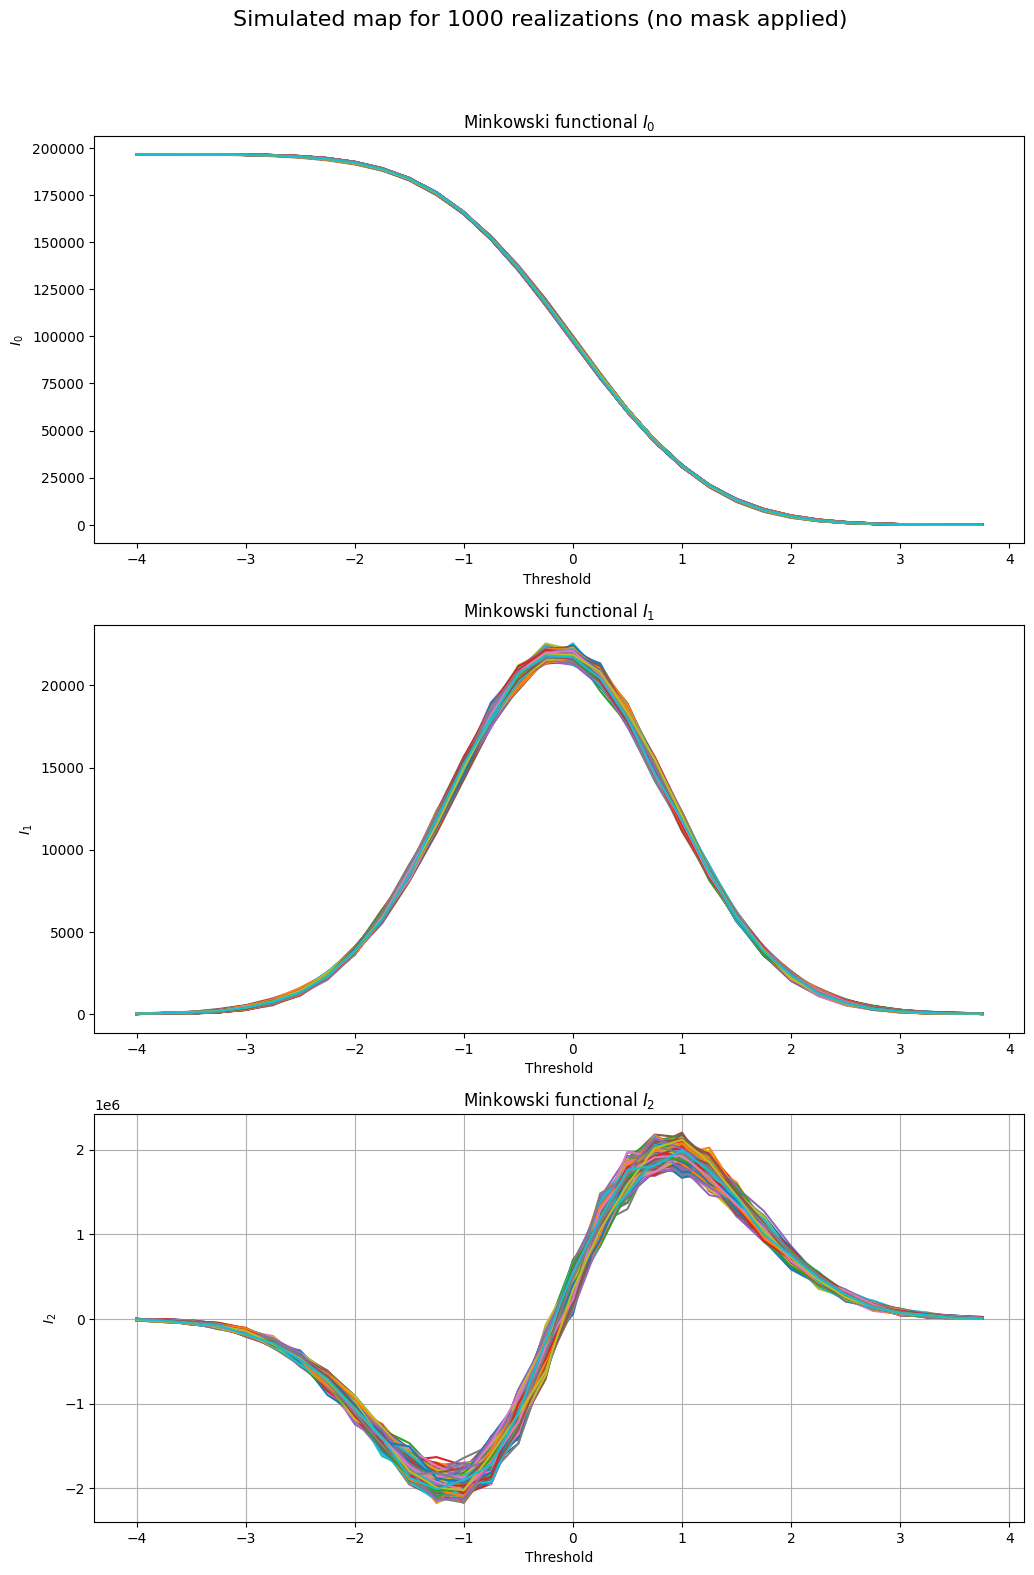

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from tqdm import tqdm
n_realizations = 1000
cl_calculated = []
mu_all = []
std_all = []
I0_all_array=[]
I1_all_array=[]
I2_all_array=[]
allrealization_f_arrays = []
fig,axs=plt.subplots(3,1,figsize=(12,18))
plt.grid()
axs[0].set_title(r"Minkowski functional $I_0$")
axs[1].set_title(r"Minkowski functional $I_1$")            
axs[2].set_title(r"Minkowski functional $I_2$")
axs[0].set_xlabel("Threshold ")
axs[1].set_xlabel("Threshold")
axs[2].set_xlabel("Threshold")
axs[0].set_ylabel(r"$I_0$")    
axs[1].set_ylabel(r"$I_1$")
axs[2].set_ylabel(r"$I_2$")
fig.suptitle(f"Simulated map for {n_realizations} realizations (no mask applied) ", fontsize=16, y=0.95)

for realization in tqdm(range(n_realizations)):
    # Generate random c_ell for each realization
   
    # plt.figure(figsize=(10,7))
    # plt.plot(ell, c_ell*ell*(ell+1)/(2.*np.pi))
    synth_map = hp.synfast(cl, nside)
    
    # hp.mollview(synth_map)
    cl_new = hp.anafast(synth_map, use_pixel_weights=True, lmax=lmax)
    cl_calculated.append(cl_new)

    # # Plot the power spectrum
    # plt.figure(figsize=(10, 6))
    # ell = np.arange(len(cl))
    # plt.plot(ell, ell * (ell + 1) * cl/2*np.pi)
    # plt.xlabel('$\ell$', fontsize=14)
    # plt.ylabel('$\ell(\ell+1)C_{\ell}/2\pi$', fontsize=14)
    # plt.title('Power Spectrum ')
    # plt.grid()

    nlmax = 3 * nside - 1
    g_alm_synth= hp.sphtfunc.map2alm(synth_map, lmax=nlmax)

    # Calculate first derivatives
    g_map_syn, d_theta_g_syn, d_phi_g_syn = hp.sphtfunc.alm2map_der1(g_alm_synth, nside)

    g_2_alm_theta_syn = hp.sphtfunc.map2alm(d_theta_g_syn, lmax=nlmax)
    theta_map_2_syn, d2_theta_g_syn, mixed1_syn = hp.sphtfunc.alm2map_der1(g_2_alm_theta_syn, nside)

    g_2_alm_phi_syn = hp.sphtfunc.map2alm(d_phi_g_syn, lmax=nlmax)
    phi_map_2_syn, d2_phi_g_syn, mixed2_syn = hp.sphtfunc.alm2map_der1(g_2_alm_phi_syn, nside)

   

    d2_theta_phi_g_syn = mixed1_syn
    mean_value_syn = np.mean(synth_map)
    std_dev_syn = np.std(synth_map)
    synth_map_data_copy = np.ma.copy(synth_map)

    mu_all.append(mean_value_syn)
    std_all.append(std_dev_syn)
 
    for i in range(len(synth_map_data_copy)):
        if type(synth_map_data_copy[i]) != np.ma.core.MaskedConstant:
            synth_map_data_copy[i] = (synth_map_data_copy[i] - mean_value_syn) / std_dev_syn

    new_norm_val_syn = synth_map_data_copy

    # plt.figure(figsize=(8, 6))
    # plt.hist(new_norm_val_syn, bins=100, color='blue')
    # plt.title('Histogram of Normalised values')
    # plt.xlabel('Pixel Value')
    # plt.ylabel('Frequency')
    # plt.grid()

    step_size = 0.25

    # hp.mollview(synth_map_data_copy, title="norm pixels map")

    i0_array_syn = []
    i1_array_syn = []
    i2_array_syn = []
    vlist_syn = []
    f_array = []

    for value in np.arange(-4, 4, step_size):
    
        one=0
        two=0
        three=0
        vlist_syn.append(value)
        min_value = value
        max_value = value + step_size
        # vlist.append(value)
        
        mask = np.logical_and(synth_map_data_copy >= min_value, synth_map_data_copy < max_value)
        #mask=TRUE in this range,FALSE for all others
        # threshold=(min_value+max_value)/2
        new_masked_data = np.zeros(synth_map_data_copy.shape)
        #now we have a copy of the masked data
        #the TRUE values in map are set to 1
        new_masked_data[mask] = 1
        sum_f = 0
        for i in range (len(new_masked_data)):
            if new_masked_data[i]==1:
                sum_f += 1
                one+= minkowski_functional(synth_map_data_copy[i] , min_value, d_theta_g_syn[i], d_phi_g_syn[i], d2_theta_g_syn[i], d2_phi_g_syn[i], d2_theta_phi_g_syn[i])[0]
                two += minkowski_functional(min_value, min_value, d_theta_g_syn[i], d_phi_g_syn[i], d2_theta_g_syn[i], d2_phi_g_syn[i], d2_theta_phi_g_syn[i])[1]
                three += minkowski_functional(min_value, min_value, d_theta_g_syn[i], d_phi_g_syn[i], d2_theta_g_syn[i], d2_phi_g_syn[i], d2_theta_phi_g_syn[i])[2]
        f_array.append(sum_f)
        i0_array_syn.append(one)
        i1_array_syn.append(two)
        i2_array_syn.append(three)
    I1_all_array.append(np.copy(i1_array_syn))
    I2_all_array.append(np.copy(i2_array_syn))
    allrealization_f_arrays.append(np.copy(f_array))

    for i in range(len(i0_array_syn)-2,-1,-1):
        i0_array_syn[i] += i0_array_syn[i+1]

    I0_all_array.append(np.copy(i0_array_syn))
    axs[0].plot(vlist_syn, i0_array_syn)
    plt.grid()
    axs[1].plot(vlist_syn, i1_array_syn)
    plt.grid()
    axs[2].plot(vlist_syn, i2_array_syn)
    plt.grid()

trial_name = "trial9point_1"
plt.savefig(trial_name + "minkowski_functional.png")
np.save(trial_name + "cl_calculated_new.npy",cl_calculated)
np.save(trial_name + "mu_all_new.npy",mu_all)
np.save(trial_name + "std_all_new.npy",std_all)
np.save(trial_name + "allrealization_f_arrays.npy", allrealization_f_arrays)
np.save(trial_name + "I0_all_array.npy", I0_all_array)
np.save(trial_name + "I1_all_array.npy", I1_all_array)
np.save(trial_name + "I2_all_array.npy", I2_all_array)

plt.show()

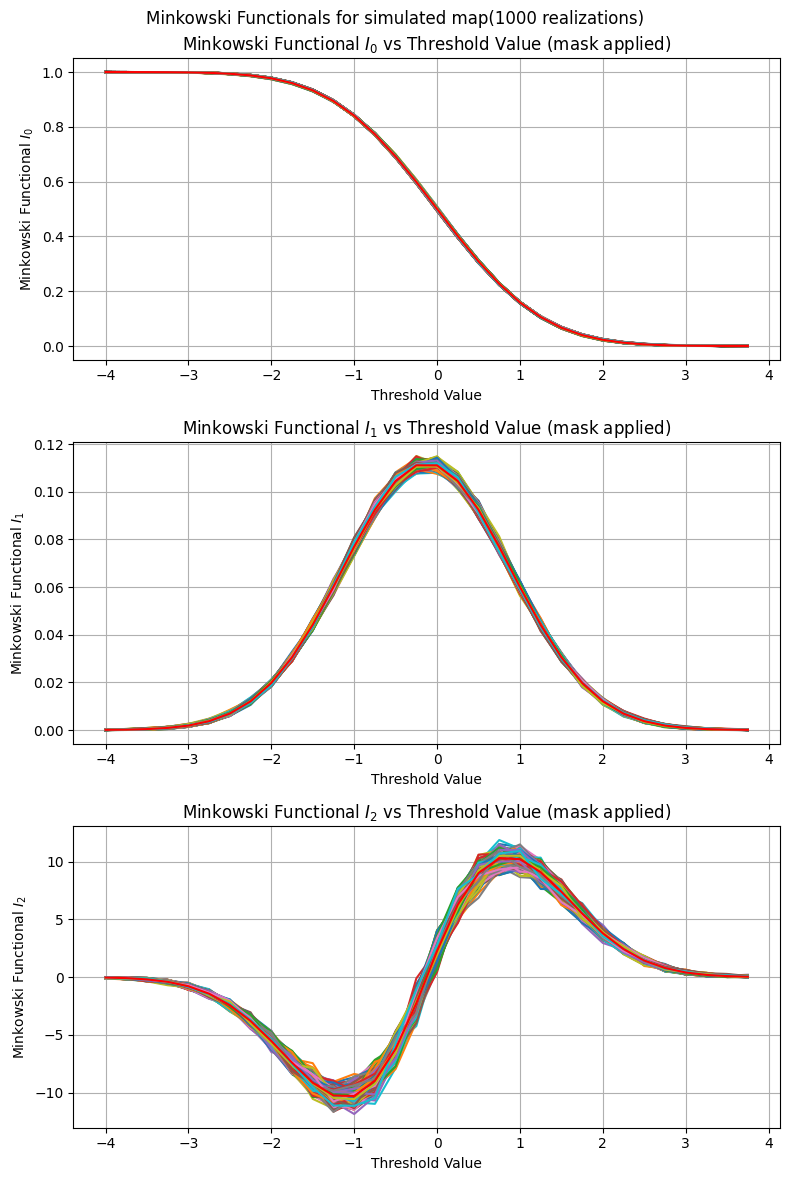

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
a = np.load('trial10point_0I0_all_array.npy')
b = np.load('trial10point_0I1_all_array.npy')
c = np.load('trial10point_0I2_all_array.npy')
v = np.arange(-4, 4, 0.25)

# Get a colormap
colormap = plt.cm.viridis

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot each array in a separate subplot
for i, data in enumerate([a, b, c]):
    for j in range(1000):
        
        axes[i].plot(v, data[j] / len(masked_map_data2.compressed()))
    axes[i].plot(v, np.mean(data, axis=0) / len(masked_map_data2.compressed()), color='red', label='Mean')
    axes[i].set_xlabel('Threshold Value')
    axes[i].set_ylabel(r'Minkowski Functional $I_{}$'.format(i))
    axes[i].set_title(r'Minkowski Functional $I_{}$ vs Threshold Value (mask applied)'.format(i))
    axes[i].grid()

# Set main title
plt.suptitle('Minkowski Functionals for simulated map(1000 realizations)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()




### trial 10 Masked simulation

In [15]:



lmax=3*hp.get_nside(masked_map_data)
cl_data_mask = hp.anafast(masked_map_data,use_pixel_weights= True,lmax=lmax)
np.save("cl_mask.npy", cl_data_mask)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [3:21:29<00:00, 12.09s/it] 


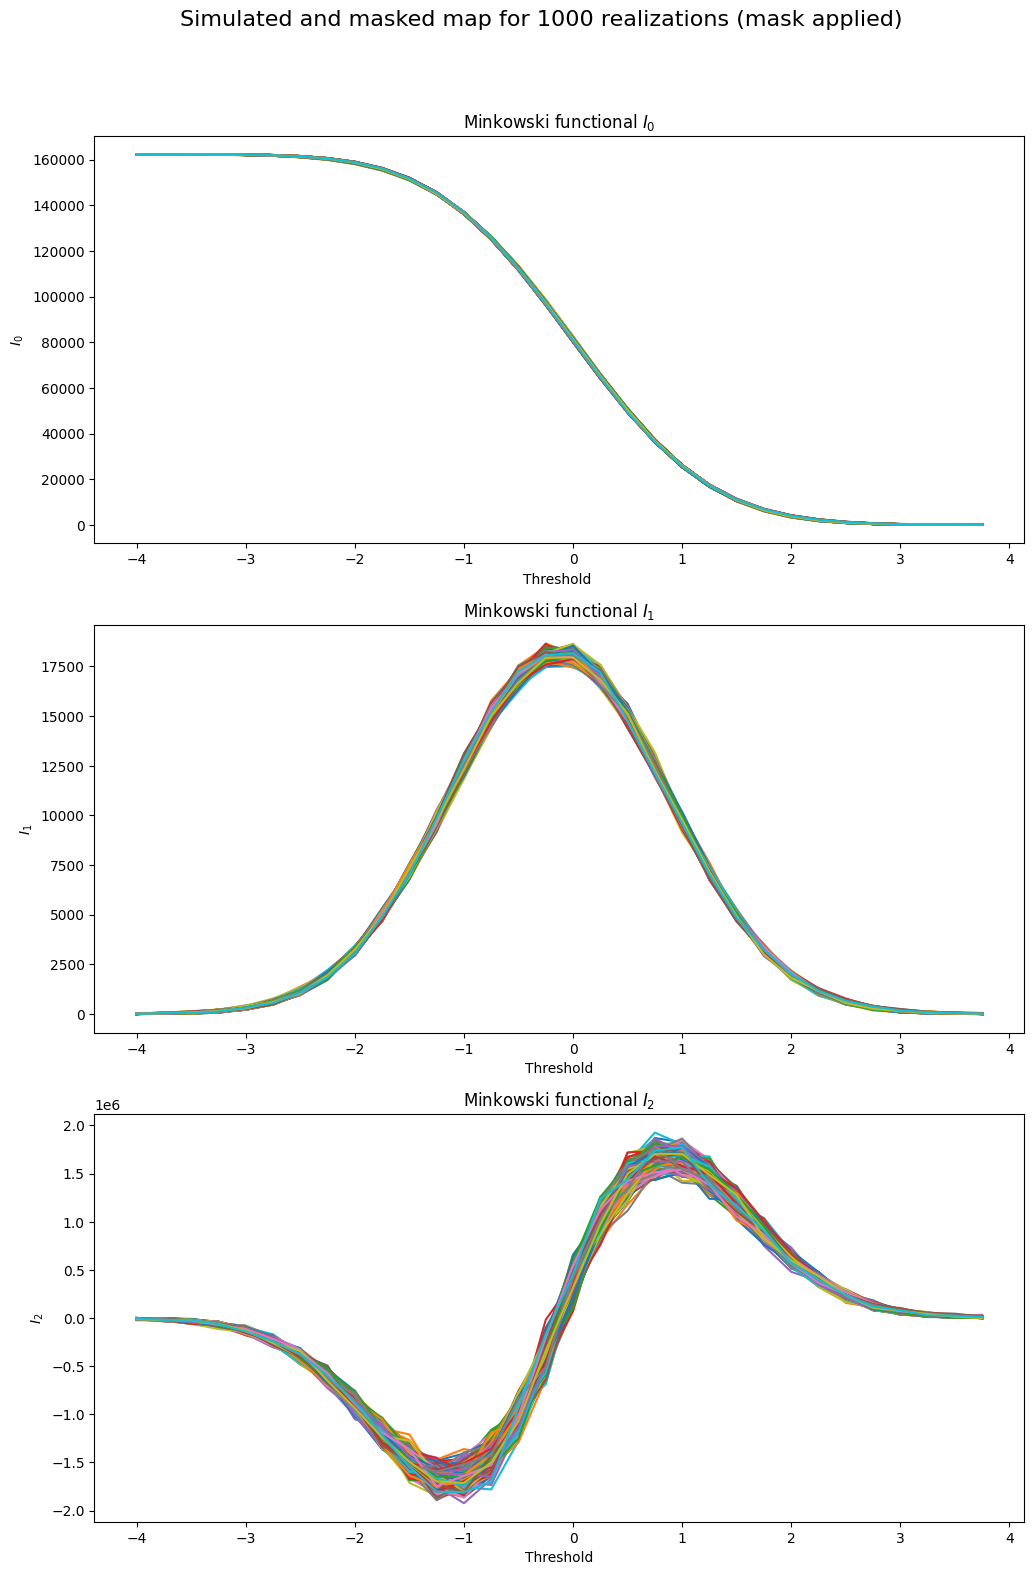

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from tqdm import tqdm
n_realizations = 1000
cl_calculated = []
mu_all = []
std_all = []
I0_all_array=[]
I1_all_array=[]
I2_all_array=[]
allrealization_f_arrays = []
fig,axs=plt.subplots(3,1,figsize=(12,18))
axs[0].set_title(r"Minkowski functional $I_0$")
axs[1].set_title(r"Minkowski functional $I_1$")            
axs[2].set_title(r"Minkowski functional $I_2$")
axs[0].set_xlabel("Threshold ")
axs[1].set_xlabel("Threshold")
axs[2].set_xlabel("Threshold")
axs[0].set_ylabel(r"$I_0$")    
axs[1].set_ylabel(r"$I_1$")
axs[2].set_ylabel(r"$I_2$")
fig.suptitle(f"Simulated and masked map for {n_realizations} realizations (mask applied) ", fontsize=16, y=0.95)

for realization in tqdm(range(n_realizations)):
    # Generate random c_ell for each realization
   
    # plt.figure(figsize=(10,7))
    # plt.plot(ell, c_ell*ell*(ell+1)/(2.*np.pi))
    synth_map_no_mask = hp.synfast(cl_data_mask, nside)
    galactic_cut_mask = np.abs(np.pi / 2 - theta) < gal_cut_threshold  # Invert the condition
    # apply the mask 
    synth_map = hp.ma(synth_map_no_mask)
    synth_map.mask = galactic_cut_mask
    existing_mask = np.ma.copy(np.ma.getmask(synth_map))
    existing_mask_NOT = np.invert(existing_mask)   
    
    #hp.mollview(synth_map)
    cl = hp.anafast(synth_map, use_pixel_weights=True, lmax=lmax)
    cl_calculated.append(cl)
   
    # # Plot the power spectrum
    # plt.figure(figsize=(10, 6))
    # ell = np.arange(len(cl))
    # plt.plot(ell, ell * (ell + 1) * cl/2*np.pi)
    # plt.xlabel('$\ell$', fontsize=14)
    # plt.ylabel('$\ell(\ell+1)C_{\ell}/2\pi$', fontsize=14)
    # plt.title('Power Spectrum ')
    # plt.grid()

    nlmax = 3 * nside - 1
    g_alm_synth= hp.sphtfunc.map2alm(synth_map, lmax=nlmax)

    # Calculate first derivatives
    g_map_syn, d_theta_g_syn, d_phi_g_syn = hp.sphtfunc.alm2map_der1(g_alm_synth, nside)

    g_2_alm_theta_syn = hp.sphtfunc.map2alm(d_theta_g_syn, lmax=nlmax)
    theta_map_2_syn, d2_theta_g_syn, mixed1_syn = hp.sphtfunc.alm2map_der1(g_2_alm_theta_syn, nside)

    g_2_alm_phi_syn = hp.sphtfunc.map2alm(d_phi_g_syn, lmax=nlmax)
    phi_map_2_syn, d2_phi_g_syn, mixed2_syn = hp.sphtfunc.alm2map_der1(g_2_alm_phi_syn, nside)

   

    d2_theta_phi_g_syn = mixed1_syn
    mean_value_syn = np.mean(synth_map)
    std_dev_syn = np.std(synth_map)
    synth_map_data_copy = np.ma.copy(synth_map)

    mu_all.append(mean_value_syn)
    std_all.append(std_dev_syn)
 
    for i in range(len(synth_map_data_copy)):
        if type(synth_map_data_copy[i]) != np.ma.core.MaskedConstant:
            synth_map_data_copy[i] = (synth_map_data_copy[i] - mean_value_syn) / std_dev_syn

    new_norm_val_syn = synth_map_data_copy

    # plt.figure(figsize=(8, 6))
    # plt.hist(new_norm_val_syn, bins=100, color='blue')
    # plt.title('Histogram of Normalised values')
    # plt.xlabel('Pixel Value')
    # plt.ylabel('Frequency')
    # plt.grid()

    step_size = 0.25

    # hp.mollview(synth_map_data_copy, title="norm pixels map")

    i0_array_syn = []
    i1_array_syn = []
    i2_array_syn = []
    vlist_syn = []
    f_array = []

    for value in np.arange(-4, 4, step_size):
    
        one=0
        two=0
        three=0
        vlist_syn.append(value)
        min_value = value
        max_value = value + step_size
        # vlist.append(value)
        
        mask = np.logical_and(synth_map_data_copy >= min_value, synth_map_data_copy < max_value)
        mask = np.logical_and(mask, existing_mask_NOT)
        #mask=TRUE in this range,FALSE for all others
        # threshold=(min_value+max_value)/2
        new_masked_data = np.zeros(synth_map_data_copy.shape)
        #now we have a copy of the masked data
        #the TRUE values in map are set to 1
        new_masked_data[mask] = 1
        sum_f = 0
        for i in range (len(new_masked_data)):
            if new_masked_data[i]==1:
                sum_f += 1
                one+= minkowski_functional(synth_map_data_copy[i] , min_value, d_theta_g_syn[i], d_phi_g_syn[i], d2_theta_g_syn[i], d2_phi_g_syn[i], d2_theta_phi_g_syn[i])[0]
                two += minkowski_functional(min_value, min_value, d_theta_g_syn[i], d_phi_g_syn[i], d2_theta_g_syn[i], d2_phi_g_syn[i], d2_theta_phi_g_syn[i])[1]
                three += minkowski_functional(min_value, min_value, d_theta_g_syn[i], d_phi_g_syn[i], d2_theta_g_syn[i], d2_phi_g_syn[i], d2_theta_phi_g_syn[i])[2]
        f_array.append(sum_f)
        i0_array_syn.append(one)
        i1_array_syn.append(two)
        i2_array_syn.append(three)
    I1_all_array.append(np.copy(i1_array_syn))
    I2_all_array.append(np.copy(i2_array_syn))
    allrealization_f_arrays.append(np.copy(f_array))

    for i in range(len(i0_array_syn)-2,-1,-1):
        i0_array_syn[i] += i0_array_syn[i+1]

    I0_all_array.append(np.copy(i0_array_syn))
    axs[0].plot(vlist_syn, i0_array_syn)
    axs[1].plot(vlist_syn, i1_array_syn)
    axs[2].plot(vlist_syn, i2_array_syn)

trial_name = "trial10point_0"
plt.savefig(trial_name + "minkowski_functional.png")
np.save(trial_name + "cl_calculated_new.npy",cl_calculated)
np.save(trial_name + "mu_all_new.npy",mu_all)
np.save(trial_name + "std_all_new.npy",std_all)
np.save(trial_name + "allrealization_f_arrays.npy", allrealization_f_arrays)
np.save(trial_name + "I0_all_array.npy", I0_all_array)
np.save(trial_name + "I1_all_array.npy", I1_all_array)
np.save(trial_name + "I2_all_array.npy", I2_all_array)
 
plt.show()

----


<font color="pink">

## ANALYSIS

</font>
We compare the analytical expression with simulations, and conclude that if we have the value of C_l and l, then the minkowski functionals can be directly constructed, no simulation required. We plot masked simulation and masked data, and unmasked simulation and unmasked data  to see if they come within 3 sigma confidence limit. Then we fit the analytic expression with masked and unmasked wmap data, and do three goodness of fit tests(Kolmogorov-Smirnov test, Anderson-Darling test and Cramér–von Mises test).

(1000, 32)
(196608,)


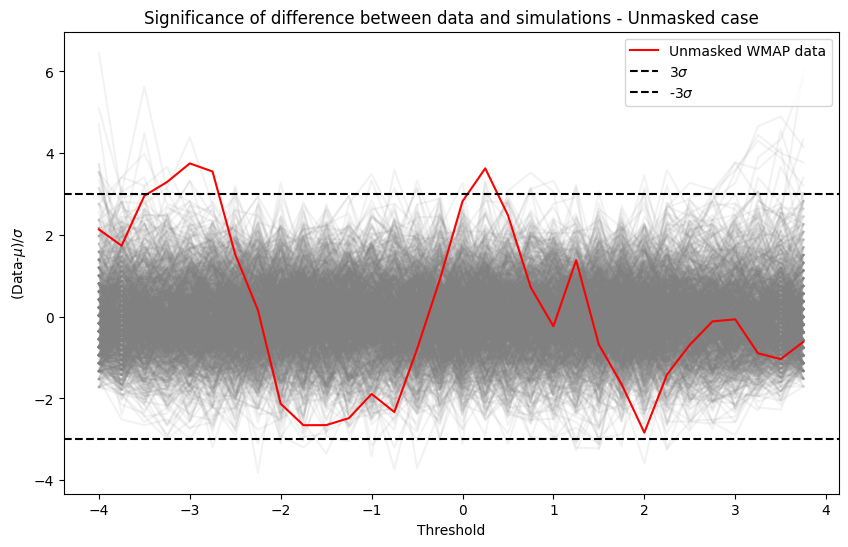

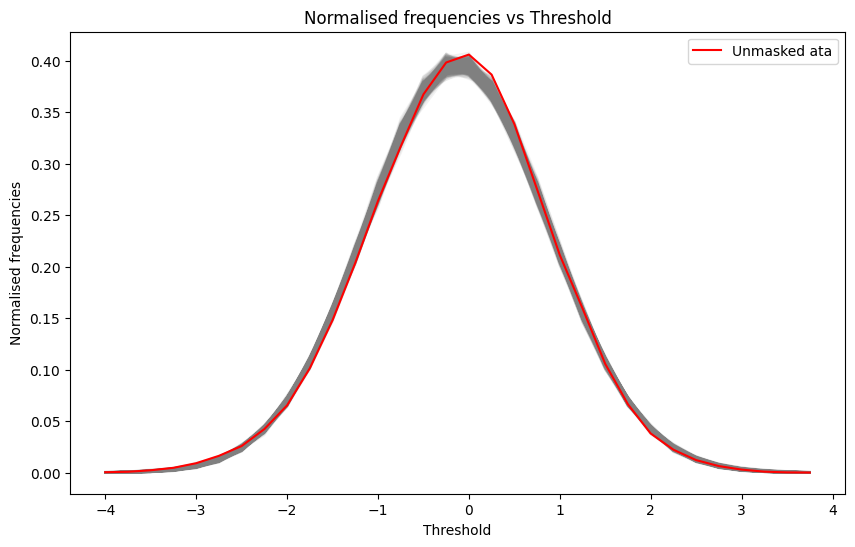

In [12]:
#we will load mu_all_trial.py

#we will load allrealization_f_arrays_trial4.npy
allrealization_f_arrays=np.load("trial10allrealization_f_arrays.npy")
datapoints=np.load("wmap2.npy")

# change the datatype to float32
allrealization_f_arrays = allrealization_f_arrays.astype(np.float32)
datapoints = datapoints.astype(np.float32)

print(allrealization_f_arrays.shape)
print(datapoints.shape)

hist = []
thresh = []
step_size = 0.25
for min_value in np.arange(-4,4,step_size):
    thresh.append(min_value)
    sum = 0
    for i in range(len(datapoints)):
        if min_value <= datapoints[i] and datapoints[i] < min_value+step_size:
            sum += 1
    hist.append(sum)

# finding area under each realization and normalizing it
allrealization_f_arrays2 = np.copy(allrealization_f_arrays)
for i in range(1000):
    # print(allrealization_f_arrays2[i])
    area = np.trapz(allrealization_f_arrays2[i], np.arange(-4, 4, 0.25))
    # print(area)
    allrealization_f_arrays2[i] = allrealization_f_arrays2[i] / area
    # print(allrealization_f_arrays2[i])

# same for the data
area = np.trapz(hist, np.arange(-4, 4, 0.25))
hist2 = hist / area


#we will take the mean along each axis
mean_f = np.mean(allrealization_f_arrays2, axis=0)
std_dev_f = np.std(allrealization_f_arrays2, axis=0)


plt.figure(figsize=(10, 6))
for i in range(1000):
    plt.plot(np.arange(-4, 4, 0.25), (allrealization_f_arrays2[i] - mean_f) / std_dev_f, alpha=0.1, color='grey')
plt.plot(np.arange(-4, 4, 0.25), (hist2 - mean_f) / std_dev_f, color='red', label='Unmasked WMAP data')
plt.xlabel('Threshold')
plt.ylabel(r'(Data-$\mu$)/$\sigma$')
plt.title('Significance of difference between data and simulations - Unmasked case')
plt.axhline(-3, color='black', linestyle='--', label=r'3$\sigma$')
plt.axhline(3, color='black', linestyle='--',label=r'-3$\sigma$')


plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
for i in range(1000):
    plt.plot(np.arange(-4, 4, 0.25), allrealization_f_arrays2[i], alpha=0.1, color='grey')
plt.plot(np.arange(-4, 4, 0.25), hist2, color='red', label='Unmasked ata')
plt.xlabel('Threshold')
plt.ylabel('Normalised frequencies')
plt.title('Normalised frequencies vs Threshold')
plt.legend()
plt.show()

(1000, 32)
(162304,)


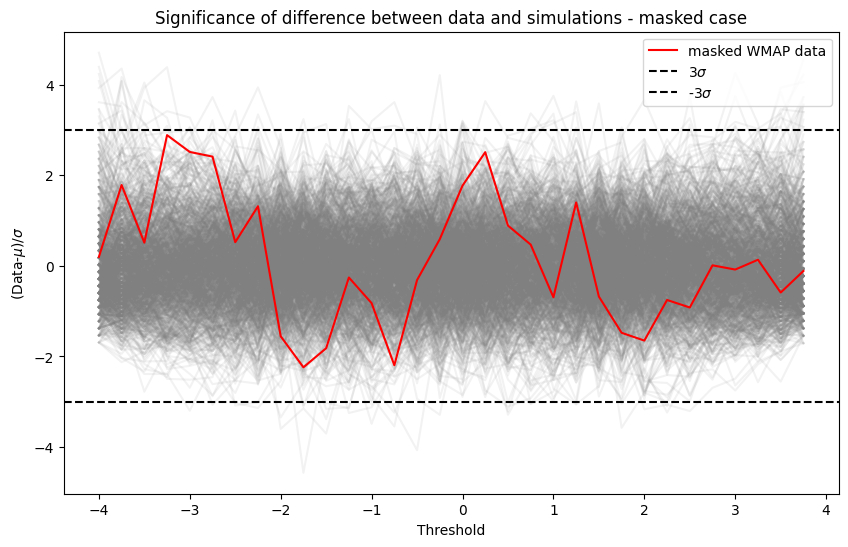

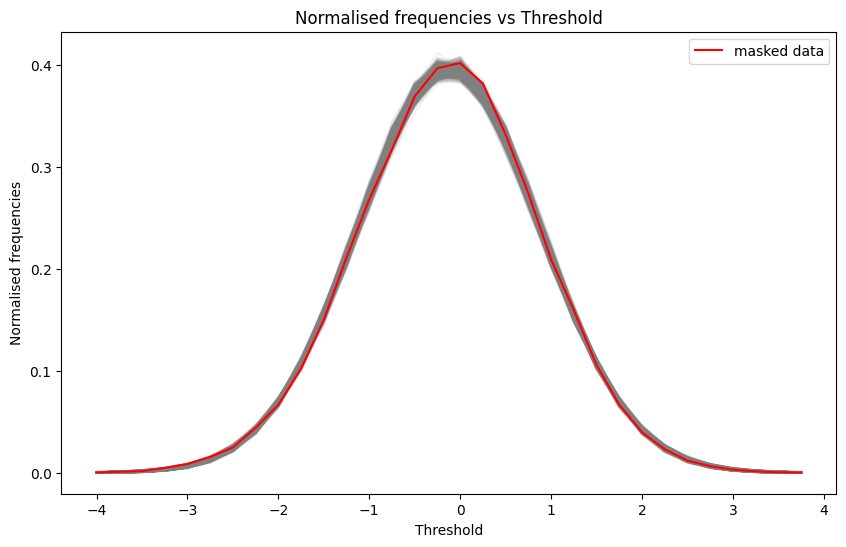

In [ ]:
#we will load mu_all_trial.py

#we will load allrealization_f_arrays_trial4.npy
allrealization_f_arrays=np.load("trial9allrealization_f_arrays.npy")
datapoints=np.load("masked_map_data2.npy")

# change the datatype to float32
allrealization_f_arrays = allrealization_f_arrays.astype(np.float32)
datapoints = datapoints.astype(np.float32)

print(allrealization_f_arrays.shape)
print(datapoints.shape)

hist = []
thresh = []
step_size = 0.25
for min_value in np.arange(-4,4,step_size):
    thresh.append(min_value)
    sum = 0
    for i in range(len(datapoints)):
        if min_value <= datapoints[i] and datapoints[i] < min_value+step_size:
            sum += 1
    hist.append(sum)

# finding area under each realization and normalizing it
allrealization_f_arrays2 = np.copy(allrealization_f_arrays)
for i in range(1000):
    # print(allrealization_f_arrays2[i])
    area = np.trapz(allrealization_f_arrays2[i], np.arange(-4, 4, 0.25))
    # print(area)
    allrealization_f_arrays2[i] = allrealization_f_arrays2[i] / area
    # print(allrealization_f_arrays2[i])

# same for the data
area = np.trapz(hist, np.arange(-4, 4, 0.25))
hist2 = hist / area


#we will take the mean along each axis
mean_f = np.mean(allrealization_f_arrays2, axis=0)
std_dev_f = np.std(allrealization_f_arrays2, axis=0)


plt.figure(figsize=(10, 6))
for i in range(1000):
    plt.plot(np.arange(-4, 4, 0.25), (allrealization_f_arrays2[i] - mean_f) / std_dev_f, alpha=0.1, color='grey')
plt.plot(np.arange(-4, 4, 0.25), (hist2 - mean_f) / std_dev_f, color='red', label='masked WMAP data')
plt.xlabel('Threshold')
plt.ylabel(r'(Data-$\mu$)/$\sigma$')
plt.title('Significance of difference between data and simulations - masked case')
plt.axhline(-3, color='black', linestyle='--', label=r'3$\sigma$')
plt.axhline(3, color='black', linestyle='--',label=r'-3$\sigma$')


plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
for i in range(1000):
    plt.plot(np.arange(-4, 4, 0.25), allrealization_f_arrays2[i], alpha=0.1, color='grey')
plt.plot(np.arange(-4, 4, 0.25), hist2, color='red', label='masked data')
plt.xlabel('Threshold')
plt.ylabel('Normalised frequencies')
plt.title('Normalised frequencies vs Threshold')
plt.legend()
plt.show()

In [ ]:
from scipy.special import erf
def sigma(cl_values,l_values):
    sum=0
    for i in range(len(cl_values)):
        
        sum+=(2*l_values[i]+1)*cl_values[i]
    
    return np.sqrt(sum/4*np.pi)
cl=np.load("trial9_cl_values.npy")

l_start = 2
l_values = np.arange(l_start, lmax+2, 1) # (2, 384) wrong?


index = 0
curr_cl = cl[index,l_start:]

print(curr_cl.shape)
print(l_values.shape)
def tau(cl_values,l_values):
    sum=0
    for i in range(len(cl_values)):
        
        sum+=((2*l_values[i]+1)*cl_values[i]*(l_values[i])*(l_values[i]+1)/2)
    
    return sum
sigma_val = sigma(curr_cl, l_values)
tau_val= tau(curr_cl,l_values)

print(sigma_val,tau_val)
v_val=np.arange(-4,4,0.0001)
v0_vals = []
v1_vals=[]
v2_vals=[]

for i in range (len(v_val)):
    v1=(np.sqrt(tau_val)/8*np.sqrt(sigma_val))*np.exp(-v_val[i]**2/(2*sigma_val))
    v2=(tau_val/((2*np.pi**(3/2))*sigma_val))*(v_val[i]/np.sqrt(2*sigma_val))*np.exp(-v_val[i]**2/(2*sigma_val))
    v0 = 0.5-0.5*erf(v_val[i]/np.sqrt(2*sigma_val))
    v0_vals.append(v0)
    v1_vals.append(v1)
    v2_vals.append(v2)



plt.plot(v_val,v1_vals)
plt.show()
plt.plot(v_val,v0_vals)
plt.show()
plt.plot(v_val,v2_vals)
plt.show()

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.optimize import curve_fit

def sigma(cl_values, l_values):
    sum = 0
    for i in range(len(cl_values)):
        sum += (2 * l_values[i] + 1) * cl_values[i]
    return np.sqrt(sum / (4 * np.pi))

def tau(cl_values, l_values):
    sum = 0
    for i in range(len(cl_values)):
        sum += (((2 * l_values[i] )+ 1) * cl_values[i] * (l_values[i]) * (l_values[i] + 1) / 2)
    return np.sqrt(sum / (4 * np.pi))

def v0_function(v, sigma_val):
    return 0.5 - 0.5 * erf(v / np.sqrt(2 * sigma_val))

def v1_function(v, sigma_val, tau_val):
    return (np.sqrt(tau_val) / (8 * np.sqrt(sigma_val))) * np.exp(-(v ** 2 )/ (2 * sigma_val))

def v2_function(v, sigma_val, tau_val):
    return (tau_val / ((2 * (np.pi ** (3 / 2))) * sigma_val)) * (v / np.sqrt(2 * sigma_val)) * np.exp(-(v ** 2) / (2 * sigma_val))

# Load data from npy files
v_val = np.arange(-4, 4, 0.25)  # Adjust step size for better resolution
# v0_vals = np.load("trial_9_diff_io.npy")
# v1_vals = np.load("trial9I1_all_array.npy")
# v2_vals = np.load("trial9I2_all_array.npy")
v0_valsm = np.load("trial_10_diff_io.npy")
v1_valsm = np.load("trial10I1_all_array.npy")
v2_valsm = np.load("trial10I2_all_array.npy")

In [35]:
v0_vals = np.load("trial_9_diff_io.npy")
v1_vals = np.load("trial9I1_all_array.npy")
v2_vals = np.load("trial9I2_all_array.npy")

In [62]:
all_threshold=[]
all_v0=[]
all_v1=[]
all_v2=[]
for i in range(1000):
    all_threshold.extend(v_val)
    all_v0.extend(v0_valsm[i])
    all_v1.extend(v1_valsm[i])
    all_v2.extend(v2_valsm[i])
#bounds for sigma and tau
bound=([0,0],[np.inf,np.inf])
#n=total number of pixels

all_threshold=np.array(all_threshold)
all_v0=np.array(all_v0)
all_v1=np.array(all_v1)
all_v2=np.array(all_v2)
# Fit the data
popt_v0, pcov_v0 = curve_fit(v0_function, all_threshold, all_v0/(len(wmap)))
popt_v1, pcov_v1 = curve_fit(v1_function, all_threshold+0.25/2, all_v1/(len(wmap)))
popt_v2, pcov_v2 = curve_fit(v2_function, all_threshold+0.25/2, all_v2/(len(wmap)))



/tmp/ipykernel_160189/1741993078.py:25: RuntimeWarning: invalid value encountered in sqrt
  return (tau_val / ((2 * (np.pi ** (3 / 2))) * sigma_val)) * (v / np.sqrt(2 * sigma_val)) * np.exp(-(v ** 2) / (2 * sigma_val))


In [78]:
all_threshold=[]
all_v0m=[]
all_v1m=[]
all_v2m=[]
for i in range(1000):
    all_threshold.extend(v_val)
    all_v0m.extend([v0_valsm[i]])  # Ensure v0_vals is iterable
    all_v1m.extend([v1_valsm[i]])  # Ensure v1_vals is iterable
    all_v2m.extend([v2_valsm[i]])  # Ensure v2_vals is iterable
#bounds for sigma and tau
bound=([0,0],[np.inf,np.inf])
#n=total number of pixels

all_threshold=np.array(all_threshold)
all_v0m=np.array(all_v0/(len(masked_map_data2.compressed())))
all_v1m=np.array(all_v1/(len(masked_map_data2.compressed())))
all_v2m=np.array(all_v2/(len(masked_map_data2.compressed())))
# Fit the data
popt_v0, pcov_v0 = curve_fit(v0_function, all_threshold, all_v0m)
popt_v1, pcov_v1 = curve_fit(v1_function, all_threshold+0.25/2, all_v1m)
popt_v2, pcov_v2 = curve_fit(v2_function, all_threshold+0.25/2, all_v2m)



/tmp/ipykernel_160189/1741993078.py:25: RuntimeWarning: invalid value encountered in sqrt
  return (tau_val / ((2 * (np.pi ** (3 / 2))) * sigma_val)) * (v / np.sqrt(2 * sigma_val)) * np.exp(-(v ** 2) / (2 * sigma_val))


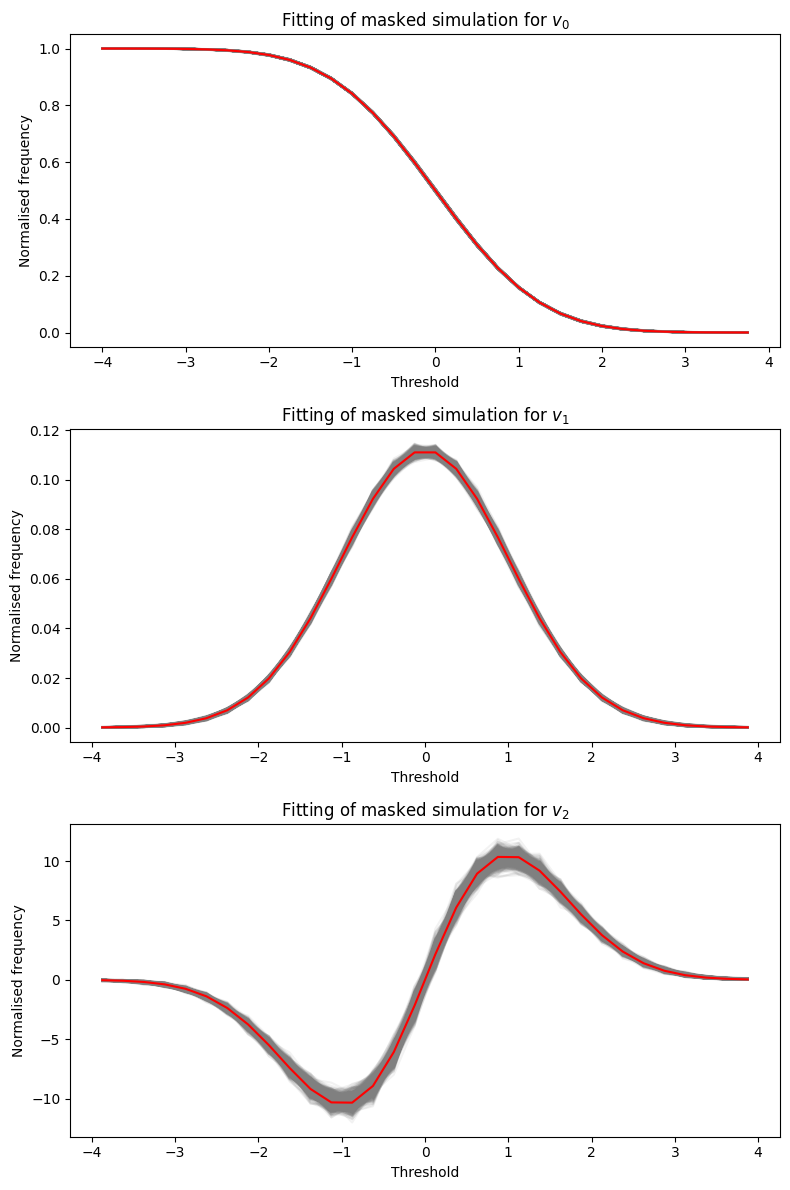

In [79]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plotting v0_vals
for i in range(1000):
    axes[0].plot(v_val, v0_valsm[i] / (len(masked_map_data2.compressed())), alpha=0.1, color='grey')

axes[0].plot(v_val, v0_function(v_val, *popt_v0), 'r-', label='v0 Fit')
axes[0].set_xlabel('Threshold')
axes[0].set_ylabel('Normalised frequency')
axes[0].set_title(r'Fitting of masked simulation for $v_0$')

# Plotting v1_vals
for i in range(1000):
    axes[1].plot(v_val + 0.25 / 2, v1_valsm[i] / (len(masked_map_data2.compressed())), alpha=0.1, color='grey')

axes[1].plot(v_val + 0.25 / 2, v1_function(v_val + 0.25 / 2, *popt_v1), 'r-', label='v1 Fit')
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('Normalised frequency')
axes[1].set_title(r'Fitting of masked simulation for $v_1$')

# Plotting v2_valsm
for i in range(1000):
    axes[2].plot(v_val + 0.25 / 2, v2_valsm[i] / (len(masked_map_data2.compressed())), alpha=0.1, color='grey')

axes[2].plot(v_val + 0.25 / 2, v2_function(v_val + 0.25 / 2, *popt_v2), 'r-', label='v2 Fit')
axes[2].set_xlabel('Threshold')
axes[2].set_ylabel('Normalised frequency')
axes[2].set_title(r'Fitting of masked simulation for $v_2$')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


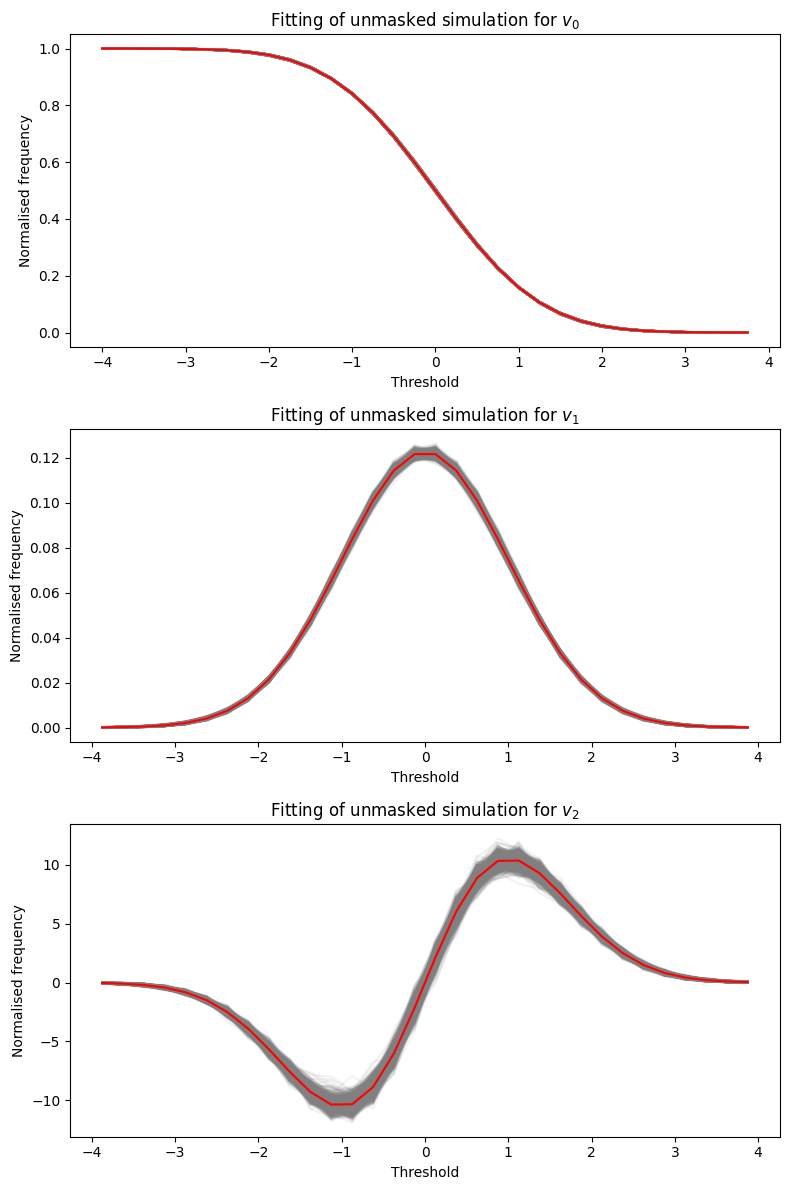

In [37]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plotting v0_vals
for i in range(1000):
    axes[0].plot(v_val, v0_vals[i] / (len(wmap)), alpha=0.1, color='grey')

axes[0].plot(v_val, v0_function(v_val, *popt_v0), 'r-', label='v0 Fit')
axes[0].set_xlabel('Threshold')
axes[0].set_ylabel('Normalised frequency')
axes[0].set_title(r'Fitting of unmasked simulation for $v_0$')

# Plotting v1_vals
for i in range(1000):
    axes[1].plot(v_val + 0.25 / 2, v1_vals[i] / (len(wmap)), alpha=0.1, color='grey')

axes[1].plot(v_val + 0.25 / 2, v1_function(v_val + 0.25 / 2, *popt_v1), 'r-', label='v1 Fit')
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('Normalised frequency')
axes[1].set_title(r'Fitting of unmasked simulation for $v_1$')

# Plotting v2_vals
for i in range(1000):
    axes[2].plot(v_val + 0.25 / 2, v2_vals[i] / (len(wmap)), alpha=0.1, color='grey')

axes[2].plot(v_val + 0.25 / 2, v2_function(v_val + 0.25 / 2, *popt_v2), 'r-', label='v2 Fit')
axes[2].set_xlabel('Threshold')
axes[2].set_ylabel('Normalised frequency')
axes[2].set_title(r'Fitting of unmasked simulation for $v_2$')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


now,fitting the data similarly


In [ ]:
v0_vals = np.load("i0_array_mask.npy")
v1_vals = np.load("i1_array_mask.npy")
v2_vals = np.load("i2_array_mask.npy")
v_val=np.arange(-4,4,0.25)
print(v0_vals.shape)
print(v1_vals.shape)
print(v2_vals.shape)
#bounds for sigma and tau
#n=total number of pixels
bound=([0,0],[np.inf,np.inf])

popt_v0, pcov_v0 = curve_fit(v0_function, v_val, v0_vals)
popt_v1, pcov_v1 = curve_fit(v1_function, v_val+0.25/2,v1_vals)
popt_v2, pcov_v2 = curve_fit(v2_function, v_val+0.25/2, v2_vals)

# plotting v0_vals

plt.plot(v_val, v0_vals, alpha=1, color='grey')
    
plt.plot(v_val, v0_function(v_val, *popt_v0), 'r-', label='v0 Fit')
plt.xlabel('Threshold')
plt.ylabel('Normalised frequency')
plt.title(r'Fitting of masked wmap data for $v_0$')
plt.show()
# plotting v0_vals

plt.plot(v_val+0.25/2, v1_vals, alpha=1, color='grey')
    
plt.plot(v_val+0.25/2, v1_function(v_val+0.25/2, *popt_v1), 'r-', label='v1 Fit')

plt.xlabel('Threshold')
plt.ylabel('Normalised frequency')
plt.title(r'Fitting of masked wmap data for $v_1$')
plt.show()
# plotting v0_vals

plt.plot(v_val+0.25/2, v2_vals, alpha=1, color='grey')
    
plt.plot(v_val+0.25/2, v2_function(v_val+0.25/2, *popt_v2), 'r-', label='v2 Fit')

plt.xlabel('Threshold')
plt.ylabel('Normalised frequency')
plt.title(r'Fitting of masked wmap data for $v_2$')
plt.show()
#we will now print the fittin g 





/tmp/ipykernel_160189/3472538331.py:25: RuntimeWarning: invalid value encountered in sqrt
  return (tau_val / ((2 * (np.pi ** (3 / 2))) * sigma_val)) * (v / np.sqrt(2 * sigma_val)) * np.exp(-(v ** 2) / (2 * sigma_val))


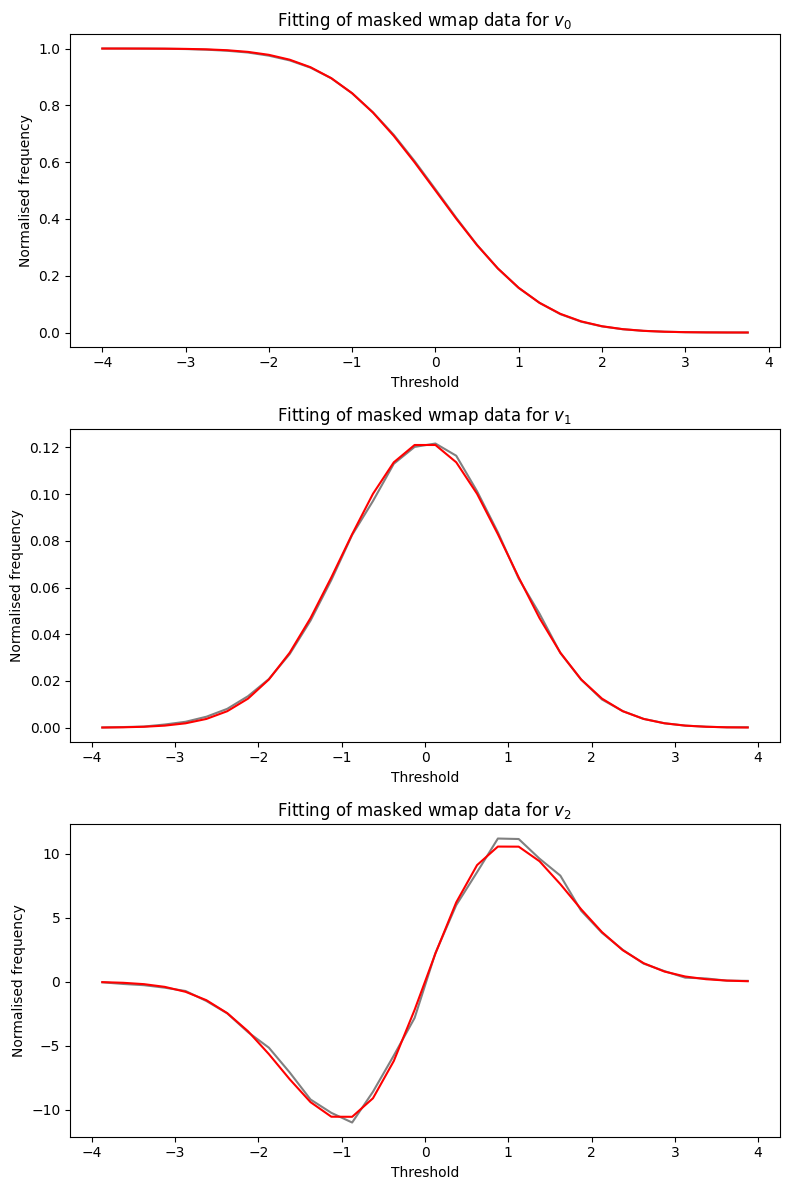

In [47]:

v_val = np.arange(-4, 4, 0.25)
v0_vals = np.load("i0_array_mask.npy")
v1_vals = np.load("i1_array_mask.npy")
v2_vals = np.load("i2_array_mask.npy")

# Bounds for sigma and tau
bound = ([0, 0], [np.inf, np.inf])

# Fit curves to the data
popt_v0, pcov_v0 = curve_fit(v0_function, v_val, v0_vals)
popt_v1, pcov_v1 = curve_fit(v1_function, v_val + 0.25 / 2, v1_vals)
popt_v2, pcov_v2 = curve_fit(v2_function, v_val + 0.25 / 2, v2_vals)

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plotting v0_vals
axes[0].plot(v_val, v0_vals, alpha=1, color='grey')
axes[0].plot(v_val, v0_function(v_val, *popt_v0), 'r-', label='v0 Fit')
axes[0].set_xlabel('Threshold')
axes[0].set_ylabel('Normalised frequency')
axes[0].set_title(r'Fitting of masked wmap data for $v_0$')

# Plotting v1_vals
axes[1].plot(v_val + 0.25 / 2, v1_vals, alpha=1, color='grey')
axes[1].plot(v_val + 0.25 / 2, v1_function(v_val + 0.25 / 2, *popt_v1), 'r-', label='v1 Fit')
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('Normalised frequency')
axes[1].set_title(r'Fitting of masked wmap data for $v_1$')

# Plotting v2_vals
axes[2].plot(v_val + 0.25 / 2, v2_vals, alpha=1, color='grey')
axes[2].plot(v_val + 0.25 / 2, v2_function(v_val + 0.25 / 2, *popt_v2), 'r-', label='v2 Fit')
axes[2].set_xlabel('Threshold')
axes[2].set_ylabel('Normalised frequency')
axes[2].set_title(r'Fitting of masked wmap data for $v_2$')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
v0_vals = np.load("i0_array_nomask.npy")
v1_vals = np.load("i1_array_nomask.npy")
v2_vals = np.load("i2_array_nomask.npy")


#bounds for sigma and tau
bound=([0,0],[np.inf,np.inf])
#n=total number of pixels

popt_v0, pcov_v0 = curve_fit(v0_function, v_val, v0_vals)
popt_v1, pcov_v1 = curve_fit(v1_function, v_val+0.25/2,v1_vals)
popt_v2, pcov_v2 = curve_fit(v2_function, v_val+0.25/2, v2_vals)

# plotting v0_vals

plt.plot(v_val, v0_vals, alpha=1, color='grey')
    
plt.plot(v_val, v0_function(v_val, *popt_v0), 'r-', label='v0 Fit')

plt.xlabel('Threshold')
plt.ylabel('Normalised frequency')
plt.title('Fitting of unmasked wmap data for v0')
plt.show()
# plotting v0_vals

plt.plot(v_val+0.25/2, v1_vals, alpha=1, color='grey')
    
plt.plot(v_val+0.25/2, v1_function(v_val+0.25/2, *popt_v1), 'r-', label='v1 Fit')

plt.xlabel('Threshold')
plt.ylabel('Normalised frequency')
plt.title('Fitting of unmasked wmap data for v1')
plt.show()
# plotting v0_vals

plt.plot(v_val+0.25/2, v2_vals, alpha=1, color='grey')
    
plt.plot(v_val+0.25/2, v2_function(v_val+0.25/2, *popt_v2), 'r-', label='v2 Fit')

plt.xlabel('Threshold')
plt.ylabel('Normalised frequency')
plt.title('Fitting of unmasked wmap data for v2')
plt.show()






/tmp/ipykernel_160189/3472538331.py:25: RuntimeWarning: invalid value encountered in sqrt
  return (tau_val / ((2 * (np.pi ** (3 / 2))) * sigma_val)) * (v / np.sqrt(2 * sigma_val)) * np.exp(-(v ** 2) / (2 * sigma_val))


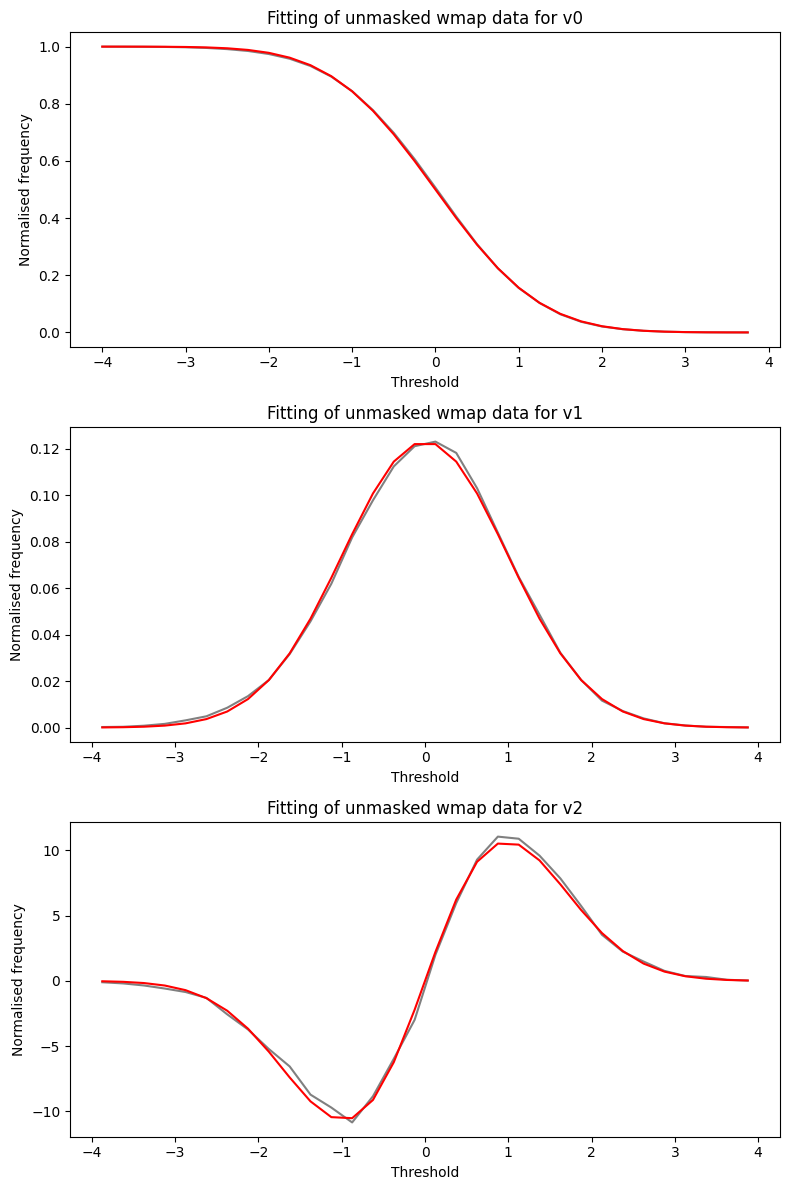

In [48]:

# Load your data
v_val = np.arange(-4, 4, 0.25)
v0_vals = np.load("i0_array_nomask.npy")
v1_vals = np.load("i1_array_nomask.npy")
v2_vals = np.load("i2_array_nomask.npy")

# Bounds for sigma and tau
bound = ([0, 0], [np.inf, np.inf])

# Fit curves to the data
popt_v0, pcov_v0 = curve_fit(v0_function, v_val, v0_vals)
popt_v1, pcov_v1 = curve_fit(v1_function, v_val + 0.25 / 2, v1_vals)
popt_v2, pcov_v2 = curve_fit(v2_function, v_val + 0.25 / 2, v2_vals)

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plotting v0_vals
axes[0].plot(v_val, v0_vals, alpha=1, color='grey')
axes[0].plot(v_val, v0_function(v_val, *popt_v0), 'r-', label='v0 Fit')
axes[0].set_xlabel('Threshold')
axes[0].set_ylabel('Normalised frequency')
axes[0].set_title('Fitting of unmasked wmap data for v0')

# Plotting v1_vals
axes[1].plot(v_val + 0.25 / 2, v1_vals, alpha=1, color='grey')
axes[1].plot(v_val + 0.25 / 2, v1_function(v_val + 0.25 / 2, *popt_v1), 'r-', label='v1 Fit')
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('Normalised frequency')
axes[1].set_title('Fitting of unmasked wmap data for v1')

# Plotting v2_vals
axes[2].plot(v_val + 0.25 / 2, v2_vals, alpha=1, color='grey')
axes[2].plot(v_val + 0.25 / 2, v2_function(v_val + 0.25 / 2, *popt_v2), 'r-', label='v2 Fit')
axes[2].set_xlabel('Threshold')
axes[2].set_ylabel('Normalised frequency')
axes[2].set_title('Fitting of unmasked wmap data for v2')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### GOODNESS OF FIT TESTS

### Kolmogorov-Smirnov test

In [53]:
from scipy.stats import ks_2samp
from prettytable import PrettyTable

# Define functions for each fit (v0_function, v1_function, v2_function)

# Load the masked and unmasked data
v0_vals_masked = np.load("i0_array_mask.npy")
v1_vals_masked = np.load("i1_array_mask.npy")
v2_vals_masked = np.load("i2_array_mask.npy")

v0_vals_unmasked = np.load("i0_array_nomask.npy")
v1_vals_unmasked = np.load("i1_array_nomask.npy")
v2_vals_unmasked = np.load("i2_array_nomask.npy")

# Fit the models for both masked and unmasked datasets
popt_v0_masked, pcov_v0_masked = curve_fit(v0_function, v_val, v0_vals_masked/162304)
popt_v1_masked, pcov_v1_masked = curve_fit(v1_function, v_val+0.25/2, v1_vals_masked/162304)
popt_v2_masked, pcov_v2_masked = curve_fit(v2_function, v_val+0.25/2, v2_vals_masked/162304)

popt_v0_unmasked, pcov_v0_unmasked = curve_fit(v0_function, v_val, v0_vals_unmasked/196608)
popt_v1_unmasked, pcov_v1_unmasked = curve_fit(v1_function, v_val+0.25/2, v1_vals_unmasked/196608)
popt_v2_unmasked, pcov_v2_unmasked = curve_fit(v2_function, v_val+0.25/2, v2_vals_unmasked/196608)

# Perform the Kolmogorov-Smirnov test for each fit and dataset
ks_stat_v0_masked, p_v0_masked = ks_2samp(v0_vals_masked, v0_function(v_val, *popt_v0_masked) * 162304)
ks_stat_v1_masked, p_v1_masked = ks_2samp(v1_vals_masked, v1_function(v_val+0.25/2, *popt_v1_masked) * 162304)
ks_stat_v2_masked, p_v2_masked = ks_2samp(v2_vals_masked, v2_function(v_val+0.25/2, *popt_v2_masked) * 162304)

ks_stat_v0_unmasked, p_v0_unmasked = ks_2samp(v0_vals_unmasked, v0_function(v_val, *popt_v0_unmasked) * 196608)
ks_stat_v1_unmasked, p_v1_unmasked = ks_2samp(v1_vals_unmasked, v1_function(v_val+0.25/2, *popt_v1_unmasked) * 196608)
ks_stat_v2_unmasked, p_v2_unmasked = ks_2samp(v2_vals_unmasked, v2_function(v_val+0.25/2, *popt_v2_unmasked) * 196608)

# Create PrettyTable for comparison
table = PrettyTable()
table.field_names = ["Fit", "Masked KS Statistic", "Masked p-value", "Unmasked KS Statistic", "Unmasked p-value"]
table.add_row(["v0", ks_stat_v0_masked, p_v0_masked, ks_stat_v0_unmasked, p_v0_unmasked])
table.add_row(["v1", ks_stat_v1_masked, p_v1_masked, ks_stat_v1_unmasked, p_v1_unmasked])
table.add_row(["v2", ks_stat_v2_masked, p_v2_masked, ks_stat_v2_unmasked, p_v2_unmasked])

# Print the table
print("Comparison of Goodness-of-Fit Test Results between Masked and Unmasked Datasets in  Kolmogorov-Smirnov (K-S) statistic test:")
print(table)


Comparison of Goodness-of-Fit Test Results between Masked and Unmasked Datasets in  Kolmogorov-Smirnov (K-S) statistic test:
+-----+---------------------+------------------------+-----------------------+------------------------+
| Fit | Masked KS Statistic |     Masked p-value     | Unmasked KS Statistic |    Unmasked p-value    |
+-----+---------------------+------------------------+-----------------------+------------------------+
|  v0 |         1.0         | 1.0913312529929464e-18 |          1.0          | 1.0913312529929464e-18 |
|  v1 |        0.0625       |   0.9999999976563841   |        0.09375        |   0.9993259137184929   |
|  v2 |        0.0625       |   0.9999999976563841   |         0.0625        |   0.9999999976563841   |
+-----+---------------------+------------------------+-----------------------+------------------------+


/tmp/ipykernel_160189/3472538331.py:22: RuntimeWarning: invalid value encountered in sqrt
  return (np.sqrt(tau_val) / (8 * np.sqrt(sigma_val))) * np.exp(-(v ** 2 )/ (2 * sigma_val))


### Anderson-Darling test

In [54]:
from scipy.stats import anderson_ksamp

# Perform the Anderson-Darling test for each fit and dataset
ad_stat_v0_masked, crit_val_v0_masked, sig_level_v0_masked = anderson_ksamp([v0_vals_masked, v0_function(v_val, *popt_v0_masked) * 162304])
ad_stat_v1_masked, crit_val_v1_masked, sig_level_v1_masked = anderson_ksamp([v1_vals_masked, v1_function(v_val+0.25/2, *popt_v1_masked) * 162304])
ad_stat_v2_masked, crit_val_v2_masked, sig_level_v2_masked = anderson_ksamp([v2_vals_masked, v2_function(v_val+0.25/2, *popt_v2_masked) * 162304])

ad_stat_v0_unmasked, crit_val_v0_unmasked, sig_level_v0_unmasked = anderson_ksamp([v0_vals_unmasked, v0_function(v_val, *popt_v0_unmasked) * 196608])
ad_stat_v1_unmasked, crit_val_v1_unmasked, sig_level_v1_unmasked = anderson_ksamp([v1_vals_unmasked, v1_function(v_val+0.25/2, *popt_v1_unmasked) * 196608])
ad_stat_v2_unmasked, crit_val_v2_unmasked, sig_level_v2_unmasked = anderson_ksamp([v2_vals_unmasked, v2_function(v_val+0.25/2, *popt_v2_unmasked) * 196608])

# Create PrettyTable for comparison
table = PrettyTable()
table.field_names = ["Fit", "Masked AD Statistic", "Masked Critical Values", "Masked Significance Level", "Unmasked AD Statistic", "Unmasked Critical Values", "Unmasked Significance Level"]
table.add_row(["v0", ad_stat_v0_masked, crit_val_v0_masked, sig_level_v0_masked, ad_stat_v0_unmasked, crit_val_v0_unmasked, sig_level_v0_unmasked])
table.add_row(["v1", ad_stat_v1_masked, crit_val_v1_masked, sig_level_v1_masked, ad_stat_v1_unmasked, crit_val_v1_unmasked, sig_level_v1_unmasked])
table.add_row(["v2", ad_stat_v2_masked, crit_val_v2_masked, sig_level_v2_masked, ad_stat_v2_unmasked, crit_val_v2_unmasked, sig_level_v2_unmasked])

# Print the table
print("Comparison of Goodness-of-Fit Test Results between Masked and Unmasked Datasets using Anderson-Darling test:")
print(table)


Comparison of Goodness-of-Fit Test Results between Masked and Unmasked Datasets using Anderson-Darling test:
+-----+---------------------+---------------------------------------------+---------------------------+-----------------------+---------------------------------------------+-----------------------------+
| Fit | Masked AD Statistic |            Masked Critical Values           | Masked Significance Level | Unmasked AD Statistic |           Unmasked Critical Values          | Unmasked Significance Level |
+-----+---------------------+---------------------------------------------+---------------------------+-----------------------+---------------------------------------------+-----------------------------+
|  v0 |  32.23973127024212  | [0.325 1.226 1.961 2.718 3.752 4.592 6.546] |           0.001           |   32.23973127024212   | [0.325 1.226 1.961 2.718 3.752 4.592 6.546] |            0.001            |
|  v1 | -1.1392482448737744 | [0.325 1.226 1.961 2.718 3.752 4.592 6.546] |

/tmp/ipykernel_160189/2925400930.py:4: UserWarning: p-value floored: true value smaller than 0.001
  ad_stat_v0_masked, crit_val_v0_masked, sig_level_v0_masked = anderson_ksamp([v0_vals_masked, v0_function(v_val, *popt_v0_masked) * 162304])
/tmp/ipykernel_160189/2925400930.py:5: UserWarning: p-value capped: true value larger than 0.25
  ad_stat_v1_masked, crit_val_v1_masked, sig_level_v1_masked = anderson_ksamp([v1_vals_masked, v1_function(v_val+0.25/2, *popt_v1_masked) * 162304])
/tmp/ipykernel_160189/2925400930.py:6: UserWarning: p-value capped: true value larger than 0.25
  ad_stat_v2_masked, crit_val_v2_masked, sig_level_v2_masked = anderson_ksamp([v2_vals_masked, v2_function(v_val+0.25/2, *popt_v2_masked) * 162304])
/tmp/ipykernel_160189/2925400930.py:8: UserWarning: p-value floored: true value smaller than 0.001
  ad_stat_v0_unmasked, crit_val_v0_unmasked, sig_level_v0_unmasked = anderson_ksamp([v0_vals_unmasked, v0_function(v_val, *popt_v0_unmasked) * 196608])
/tmp/ipykernel_160

### Cramér–von Mises test(optional)

In [55]:
from scipy.stats import cramervonmises_2samp

# Perform the Cramér–von Mises test for each fit and dataset
cvm_result_v0_masked = cramervonmises_2samp(v0_vals_masked, v0_function(v_val, *popt_v0_masked) * 162304)
cvm_result_v1_masked = cramervonmises_2samp(v1_vals_masked, v1_function(v_val+0.25/2, *popt_v1_masked) * 162304)
cvm_result_v2_masked = cramervonmises_2samp(v2_vals_masked, v2_function(v_val+0.25/2, *popt_v2_masked) * 162304)

cvm_result_v0_unmasked = cramervonmises_2samp(v0_vals_unmasked, v0_function(v_val, *popt_v0_unmasked) * 196608)
cvm_result_v1_unmasked = cramervonmises_2samp(v1_vals_unmasked, v1_function(v_val+0.25/2, *popt_v1_unmasked) * 196608)
cvm_result_v2_unmasked = cramervonmises_2samp(v2_vals_unmasked, v2_function(v_val+0.25/2, *popt_v2_unmasked) * 196608)

# Extract test statistics and p-values
cvm_stat_v0_masked, p_v0_masked = cvm_result_v0_masked.statistic, cvm_result_v0_masked.pvalue
cvm_stat_v1_masked, p_v1_masked = cvm_result_v1_masked.statistic, cvm_result_v1_masked.pvalue
cvm_stat_v2_masked, p_v2_masked = cvm_result_v2_masked.statistic, cvm_result_v2_masked.pvalue

cvm_stat_v0_unmasked, p_v0_unmasked = cvm_result_v0_unmasked.statistic, cvm_result_v0_unmasked.pvalue
cvm_stat_v1_unmasked, p_v1_unmasked = cvm_result_v1_unmasked.statistic, cvm_result_v1_unmasked.pvalue
cvm_stat_v2_unmasked, p_v2_unmasked = cvm_result_v2_unmasked.statistic, cvm_result_v2_unmasked.pvalue

# Create PrettyTable for comparison
table_cvm = PrettyTable()
table_cvm.field_names = ["Fit", "Masked CvM Statistic", "Masked p-value", "Unmasked CvM Statistic", "Unmasked p-value"]
table_cvm.add_row(["v0", cvm_stat_v0_masked, p_v0_masked, cvm_stat_v0_unmasked, p_v0_unmasked])
table_cvm.add_row(["v1", cvm_stat_v1_masked, p_v1_masked, cvm_stat_v1_unmasked, p_v1_unmasked])
table_cvm.add_row(["v2", cvm_stat_v2_masked, p_v2_masked, cvm_stat_v2_unmasked, p_v2_unmasked])

# Print the table
print("Comparison of Goodness-of-Fit Test Results between Masked and Unmasked Datasets using Cramér–von Mises test:")
print(table_cvm)


Comparison of Goodness-of-Fit Test Results between Masked and Unmasked Datasets using Cramér–von Mises test:
+-----+----------------------+------------------------+------------------------+------------------------+
| Fit | Masked CvM Statistic |     Masked p-value     | Unmasked CvM Statistic |    Unmasked p-value    |
+-----+----------------------+------------------------+------------------------+------------------------+
|  v0 |      5.3359375       | 1.9855894706211075e-10 |       5.3359375        | 1.9855894706211075e-10 |
|  v1 |     0.0205078125     |   0.9991276544248582   |      0.021484375       |   0.9986776446467168   |
|  v2 |     0.009765625      |   0.9999999991362903   |      0.013671875       |   0.9999954622279605   |
+-----+----------------------+------------------------+------------------------+------------------------+


---